# Aprendizado de Máquina de Ponto a Ponto

## Setup


Para o setup, vamos precisar de importar as bibliotecas necessárias para manipulação de ficheiros (pandas), computação numérica (numpy), visualização (seaborn e matplotlib) e I/O (os), escrever algumas funções para auxílio.

In [1]:
import os

import numpy as np 
import pandas as pd 
import seaborn as sns
import math

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
def save_plot(filename, folder="plots", dpi=300, file_format="png"):
    """
    Salva a figura atual do matplotlib com o nome de arquivo fornecido.

    Parâmetros:
    - `filename` (str): O nome do arquivo (sem a extensão).
    - `folder` (str): O diretório onde salvar o gráfico. O padrão é "plots".
    - `dpi` (int): A resolução do gráfico salvo em pontos por polegada. O padrão é 300.
    - `file_format` (str): O formato do arquivo para salvar o gráfico. O padrão é "png". Formatos suportados incluem 'png', 'jpg', 'svg', 'pdf', etc.

    Retorna:
    - Nenhum
    """
    
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    file_path = os.path.join(folder, f"{filename}.{file_format}")
    
    plt.savefig(file_path, dpi=dpi, format=file_format, bbox_inches='tight')
    print(f"Imagem salva como: {file_path}")


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Precisamos de baixar o dataset do Kaggle para a partir do kaggle. Para isso, utilizamos o kagglehub, já ñ precisamos de autenticação para aceder datasets públicos.


In [5]:
import kagglehub

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Define o caminho ou identificador do conjunto de dados no Kaggle.
path = "shashwatwork/failure-analysis-in-power-transformers-dataset"

# Faz o download do dataset utilizando o método dataset_download.
path = kagglehub.dataset_download(path)

In [7]:
print("Caminho para os ficheiros no dataset:", path)

Caminho para os ficheiros no dataset: /home/codespace/.cache/kagglehub/datasets/shashwatwork/failure-analysis-in-power-transformers-dataset/versions/1


In [8]:
# Lê o arquivo CSV "Health index1.csv" localizado no diretório especificado e o carrega em um DataFrame.
hlth_df = pd.read_csv(path + '/Health index1.csv')

## Análise Exploratória de dados

Em **Exploratory Data Analysis (EDA)**, realiza-se uma análise inicial dos dados para entender os seus atributos principais. Isso inclui:

1. Carregar e inspecionar os dados.
2. Calcular resumos estatísticos (média, desvio padrão, etc.).
3. Visualizar distribuições e relações entre variáveis.
4. Identificar outliers.
5. Analisar correlações entre variáveis.
6. Tratar dados faltantes.
7. Transformar dados para modelagem.

O objetivo é identificar padrões, problemas e preparar os dados para análise ou modelagem.

`describe` dá uma visão estatística geral dos nossos dados.

In [ ]:
hlth_df.describe()

Hydrogen         Oxigen      Nitrogen      Methane           CO  \
count    470.000000     470.000000    470.000000   470.000000   470.000000   
mean     404.261702    8357.372340  47759.561702    79.695745   244.000000   
std     2002.142678   14164.233283  13760.451816   489.320336   237.267485   
min        0.000000      57.000000   3600.000000     0.000000    10.000000   
25%        4.000000     496.000000  41700.000000     2.000000    66.000000   
50%        9.000000    3810.000000  49100.000000     3.000000   150.500000   
75%       34.000000   14875.000000  55875.000000     7.000000   361.750000   
max    23349.000000  249900.000000  85300.000000  7406.000000  1730.000000   

                CO2      Ethylene       Ethane   Acethylene        DBDS  \
count    470.000000    470.000000   470.000000   470.000000  470.000000   
mean    1816.414894    162.923404    81.940426    91.491489   17.036596   
std     2256.790519   1323.811504   342.573636   644.365828   46.735057   
min       48.000000      0.000000     0.000000     0.000000    0.000000   
25%      641.750000      0.000000     0.000000     0.000000    0.000000   
50%     1125.000000      3.000000     4.000000     0.000000    0.000000   
75%     2257.500000      6.000000    69.750000     0.000000    2.000000   
max    24900.000000  16684.000000  5467.000000  9740.000000  227.000000   

       Power factor  Interfacial V  Dielectric rigidity  Water content  \
count    470.000000     470.000000           470.000000     470.000000   
mean       1.849043      38.434043            53.495745      16.282979   
std        6.144009       6.178830             6.458906      17.115646   
min        0.050000      21.000000            27.000000       0.000000   
25%        0.570000      32.000000            51.000000       5.000000   
50%        1.000000      39.000000            54.000000      12.000000   
75%        1.000000      44.000000            56.000000      21.000000   
max       73.200000      57.000000            75.000000     183.000000   

       Health index  Life expectation  
count    470.000000        470.000000  
mean      27.504043         33.010426  
std       17.741458         17.791047  
min       13.400000          6.000000  
25%       13.400000         19.000000  
50%       13.400000         32.000000  
75%       38.550000         51.000000  
max       95.200000         51.000000

`info` nos informa o tipo de dados existentes e geralmente quantos faltam. Felizmente temos os dados todos completos (nenhum nulo).

In [10]:
hlth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
 15  Life expectation     470 non-null    flo

Saber sobre a distribuição dos dados ajuda a entender a forma dos dados, tendências centrais, dispersão e a detetar anormalidades (outliers).

Imagem salva como: plots/Data Distributions.png


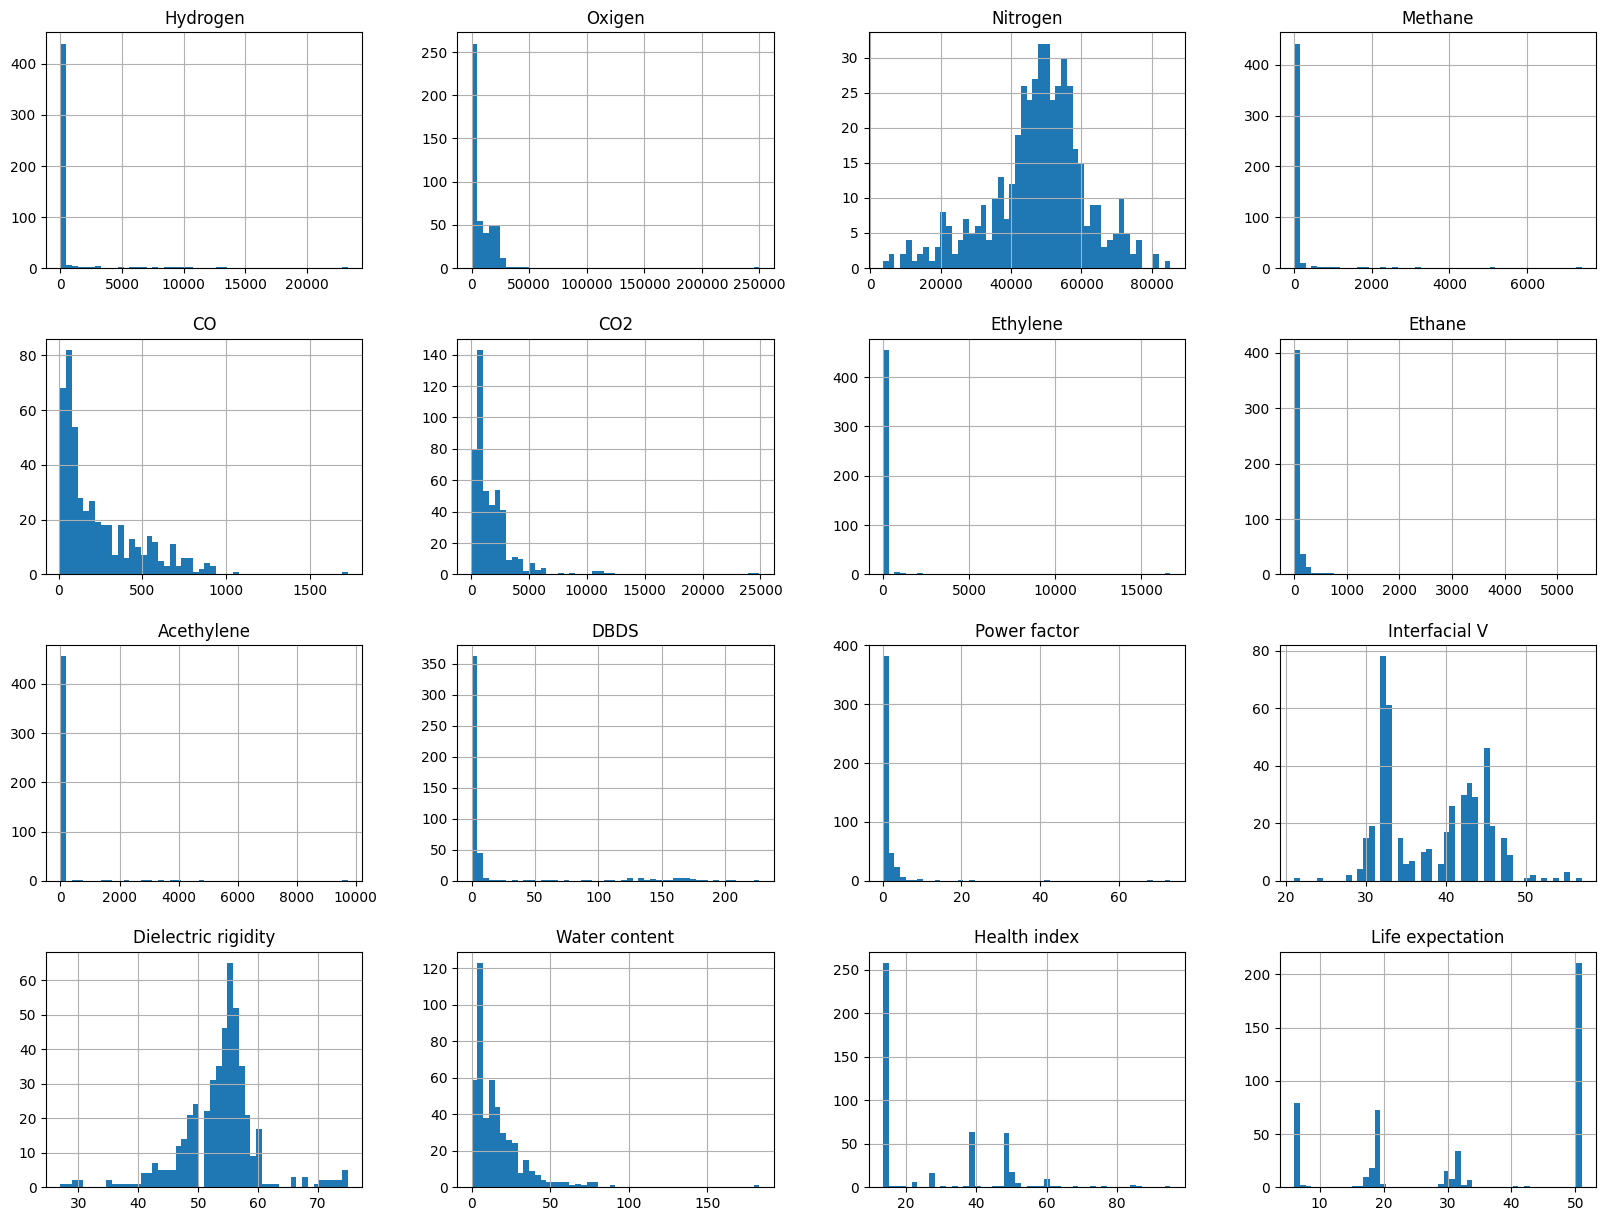

In [11]:
hlth_df.hist(bins=50, figsize=(20, 15))
save_plot('Data Distributions')
plt.show()

Para entender como os dados se relacionam entre si, é necessário plotar cada atributo contra os outros. Isso ajuda a entender:

1. **Relações entre variáveis**: Mostra correlações e padrões entre os atributos.
2. **Interações multivariadas**: Identifica dependências complexas entre vários atributos.
3. **Agrupamentos**: Revela clusters ou grupos de dados semelhantes.
4. **Outliers**: Facilita a identificação de valores atípicos.
5. **Estrutura dos dados**: Mostra relações lineares ou não lineares para escolher o modelo adequado.
6. **Padrões de distribuição**: Ajuda a entender a simetria ou distorção nos dados.



Imagem salva como: plots/All Data Pair Plot.png


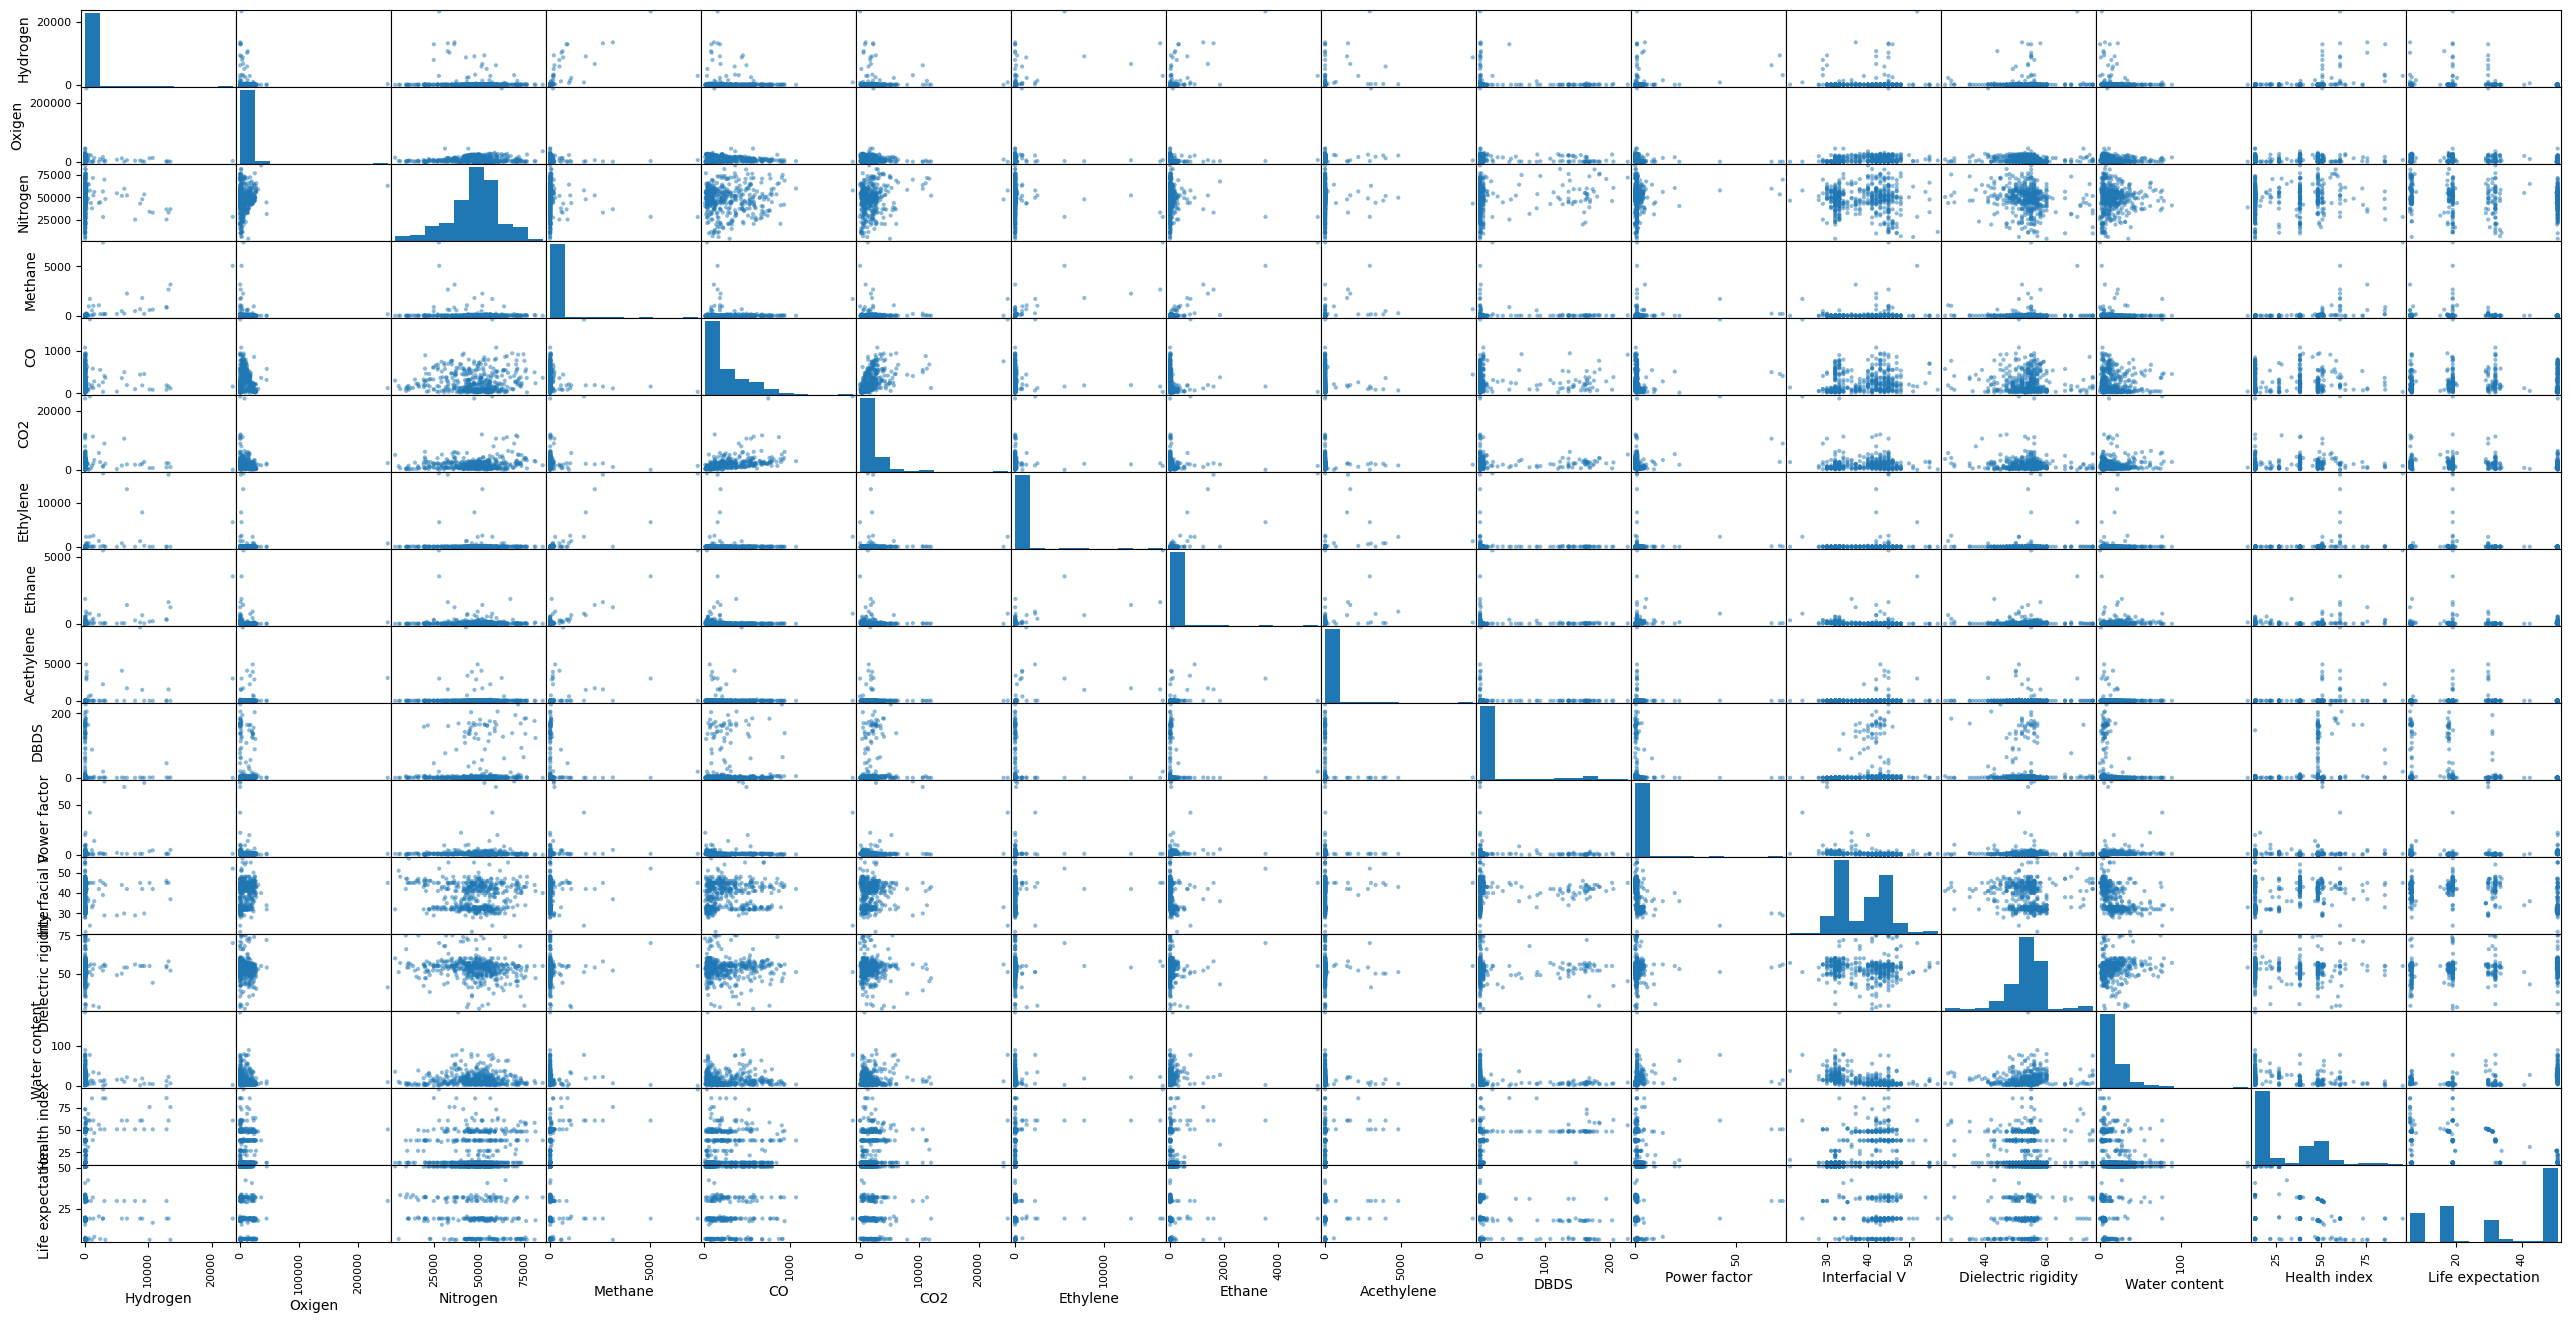

In [12]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(hlth_df, figsize=(32, 16), grid=True)
save_plot('All Data Pair Plot')

Para datasets mais complexos, essa abordagem se torna difícil de utilizar. Muitas vezes existem centenas de variáveis no dataset. Neste, com 16 entradas, já se torna difícil encontrar tendências a olho nu. Para simplificar a análise, pode-se observar coeficientes de relação linear entre os atributos.

Esses coeficientes medem a força e direção da relação entre dois atributos. O **coeficiente de correlação de Pearson** é o mais comum e varia de -1 a +1:

- **+1**: Correlação perfeita positiva (quando uma variável sobe, a outra também sobe de forma proporcional).
- **-1**: Correlação perfeita negativa (quando uma variável sobe, a outra diminui de forma proporcional).
- **0**: Nenhuma correlação linear (não há relação clara entre as variáveis).

Outras formas de correlação incluem:
- **Correlação de Spearman**: Mede relações monotônicas (crescentes ou decrescentes, mas não necessariamente lineares).
- **Correlação de Kendall**: Similar à de Spearman, mas mais robusta para pequenos conjuntos de dados e menos sensível a outliers.

Esses coeficientes ajudam a identificar como as variáveis estão relacionadas, mas é importante lembrar que correlação não significa causalidade.

Imagem salva como: plots/Pearson Correlation Heatmap.png


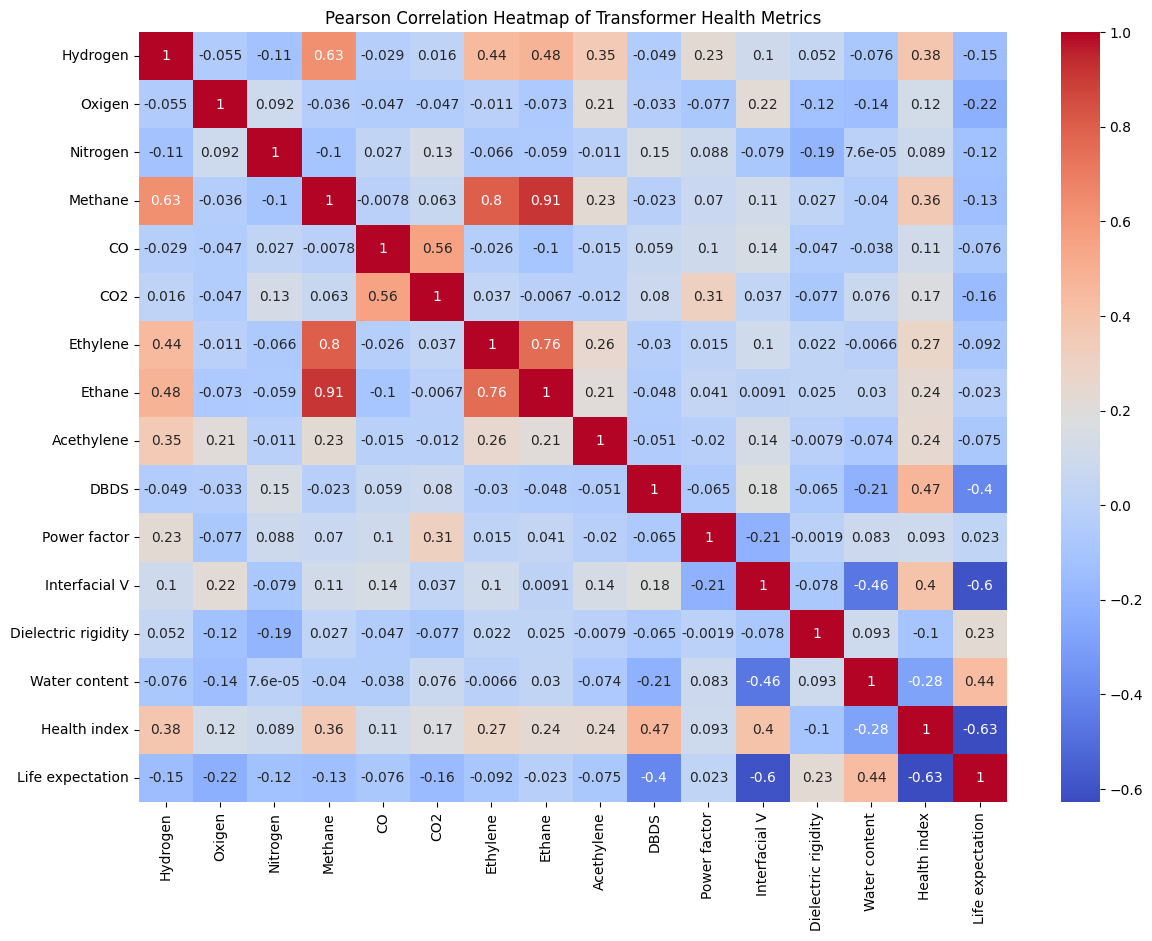

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(hlth_df.corr(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap of Transformer Health Metrics')
save_plot('Pearson Correlation Heatmap')
plt.show()

Para entender as correlações, é necessário entender o porquê de termos muitos atributos que medem a concentração de certos gases no óleo isolante do transformador. A técnica utilizada para interpretar esses dados é a **Análise de Gás Dissolvido**.

A **Análise de Gás Dissolvido (DGA)** em transformadores de potência é uma técnica de diagnóstico utilizada para avaliar a saúde e a condição do sistema de isolamento do transformador. Essa técnica envolve a extração e análise dos gases dissolvidos no óleo isolante dos transformadores. Esses gases são subprodutos de diversas reações químicas no interior do transformador, indicando, muitas vezes, o tipo e a gravidade das falhas.  

Os principais gases analisados incluem:  
- **Hidrogênio (H₂)**: Normalmente associado a descargas parciais. 
- **Metano (CH₄)**: Também relacionado a descargas parciais.  
   - Um aumento na concentração desses gases sugere que o índice de saúde está diminuindo, indicando um início de degradação ou estresse elétrico no sistema de isolamento.
- **Etano (C₂H₆)**: Indica falhas térmicas a baixas temperaturas.
- **Etileno (C₂H₄)**: Sinaliza falhas térmicas a altas temperaturas. Um aumento significativo neste gás aponta para uma deterioração mais severa do índice de saúde, sugerindo que há uma degradação mais intensa do isolamento devido ao calor.
- **Acetileno (C₂H₂)**: Marcador de arco elétrico ou falhas elétricas graves. 
- **Monóxido de Carbono (CO)**: Geralmente relacionado à degradação do isolamento de celulose.  
- **Dióxido de Carbono (CO₂)**: Relacionado à degradação do isolamento em temperaturas mais baixas que o CO. 
   - Um aumento em CO indica que a degradação está ocorrendo em temperaturas mais altas, enquanto um aumento em CO₂ pode ser observado em temperaturas mais baixas.

**Como é feita a DGA?**  

1. **Amostragem**:  
   - Amostras de óleo são retiradas do transformador, geralmente através de uma válvula.  

2. **Extração de gases**:  
   - Os gases são extraídos do óleo utilizando métodos como cromatografia gasosa headspace ou técnicas de extração direta.  

3. **Análise**:  
   - As concentrações dos gases são determinadas por cromatografia gasosa. Os resultados são comparados com normas padrão ou dados históricos do transformador.  

Padrões como IEEE C57.104 e IEC 60599 guiam a interpretação da DGA, categorizando falhas com base na concentração de gases. Análises de tendência ao longo do tempo são cruciais, e casos complexos podem necessitar de especialistas para interpretação precisa.


A teoria diz que as concentrações dos gases deve ser inversamente proporcional ao **Índice de Saúde**, o que ñ se observa na matriz de correlação. É provável que o valor presente aí ñ seja o índice, mas o seu conjugado. Essa suspeita é comprovada pela observação do gráfico da **expectativa de vida** contra o **índice de saúde** e a sua correlação negativa. 

Imagem salva como: plots/Life expectation vs Health index.png


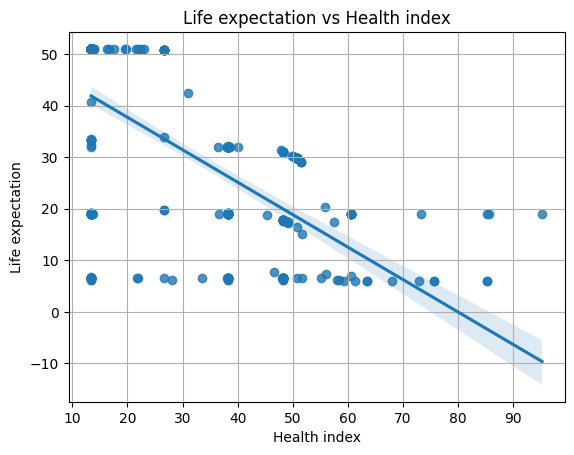

In [14]:
sns.regplot(x='Health index', y='Life expectation', data=hlth_df)
plt.title('Life expectation vs Health index')
plt.grid(True)
save_plot('Life expectation vs Health index')
plt.show()

Normalizando e calculando o o conjugado do índice de saúde.

In [15]:
hlth_df['Health index conj'] = 1 - hlth_df['Health index'] / 100
hlth_df['Health index conj']

0      0.048
1      0.145
2      0.147
3      0.147
4      0.148
       ...  
465    0.866
466    0.866
467    0.866
468    0.866
469    0.866
Name: Health index conj, Length: 470, dtype: float64

Imagem salva como: plots/Pearson Correlation Heatmap with Health Index Conjugate.png


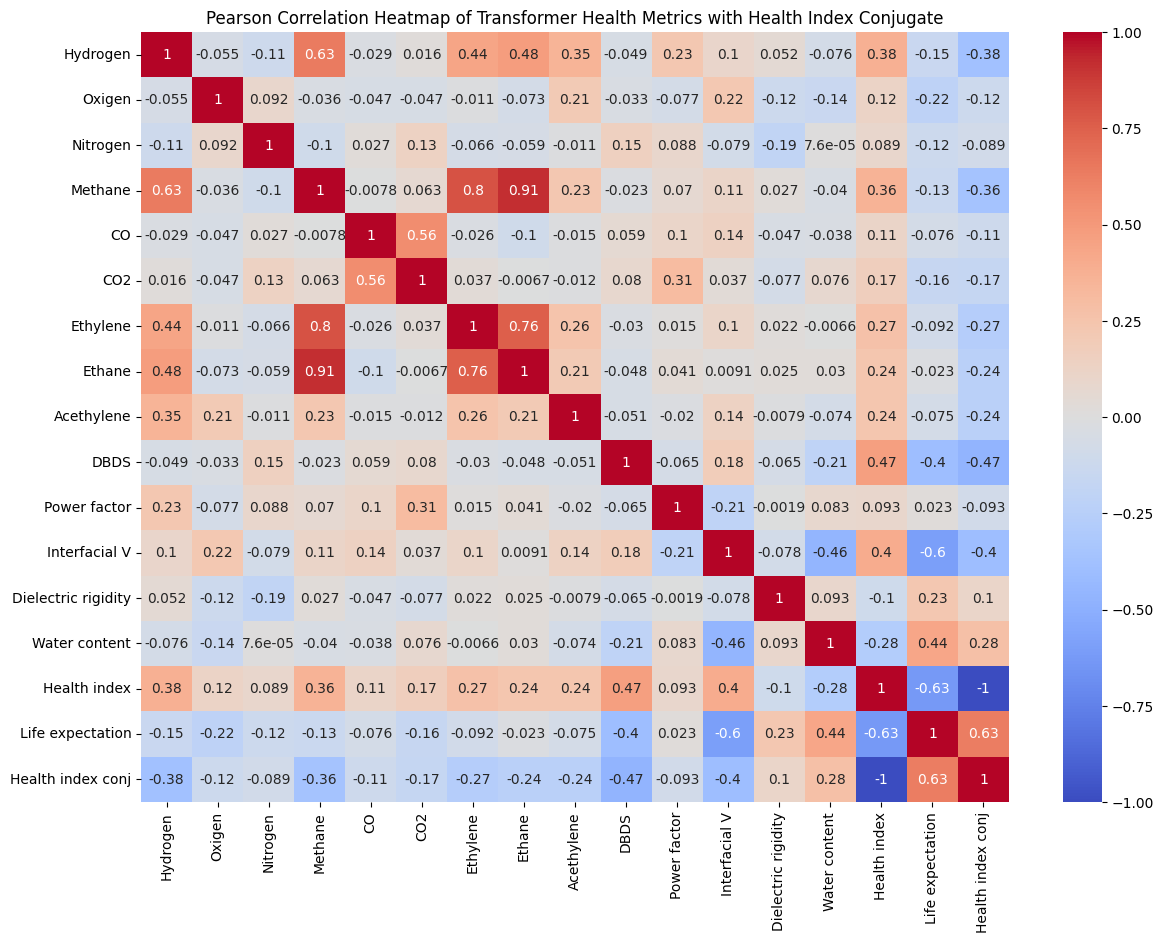

In [16]:
plt.figure(figsize=(14, 10))
sns.heatmap(hlth_df.corr(), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap of Transformer Health Metrics with Health Index Conjugate')
save_plot('Pearson Correlation Heatmap with Health Index Conjugate')
plt.show()

Imagem salva como: plots/All Data Pair Plot with Health Index Conjugate.png


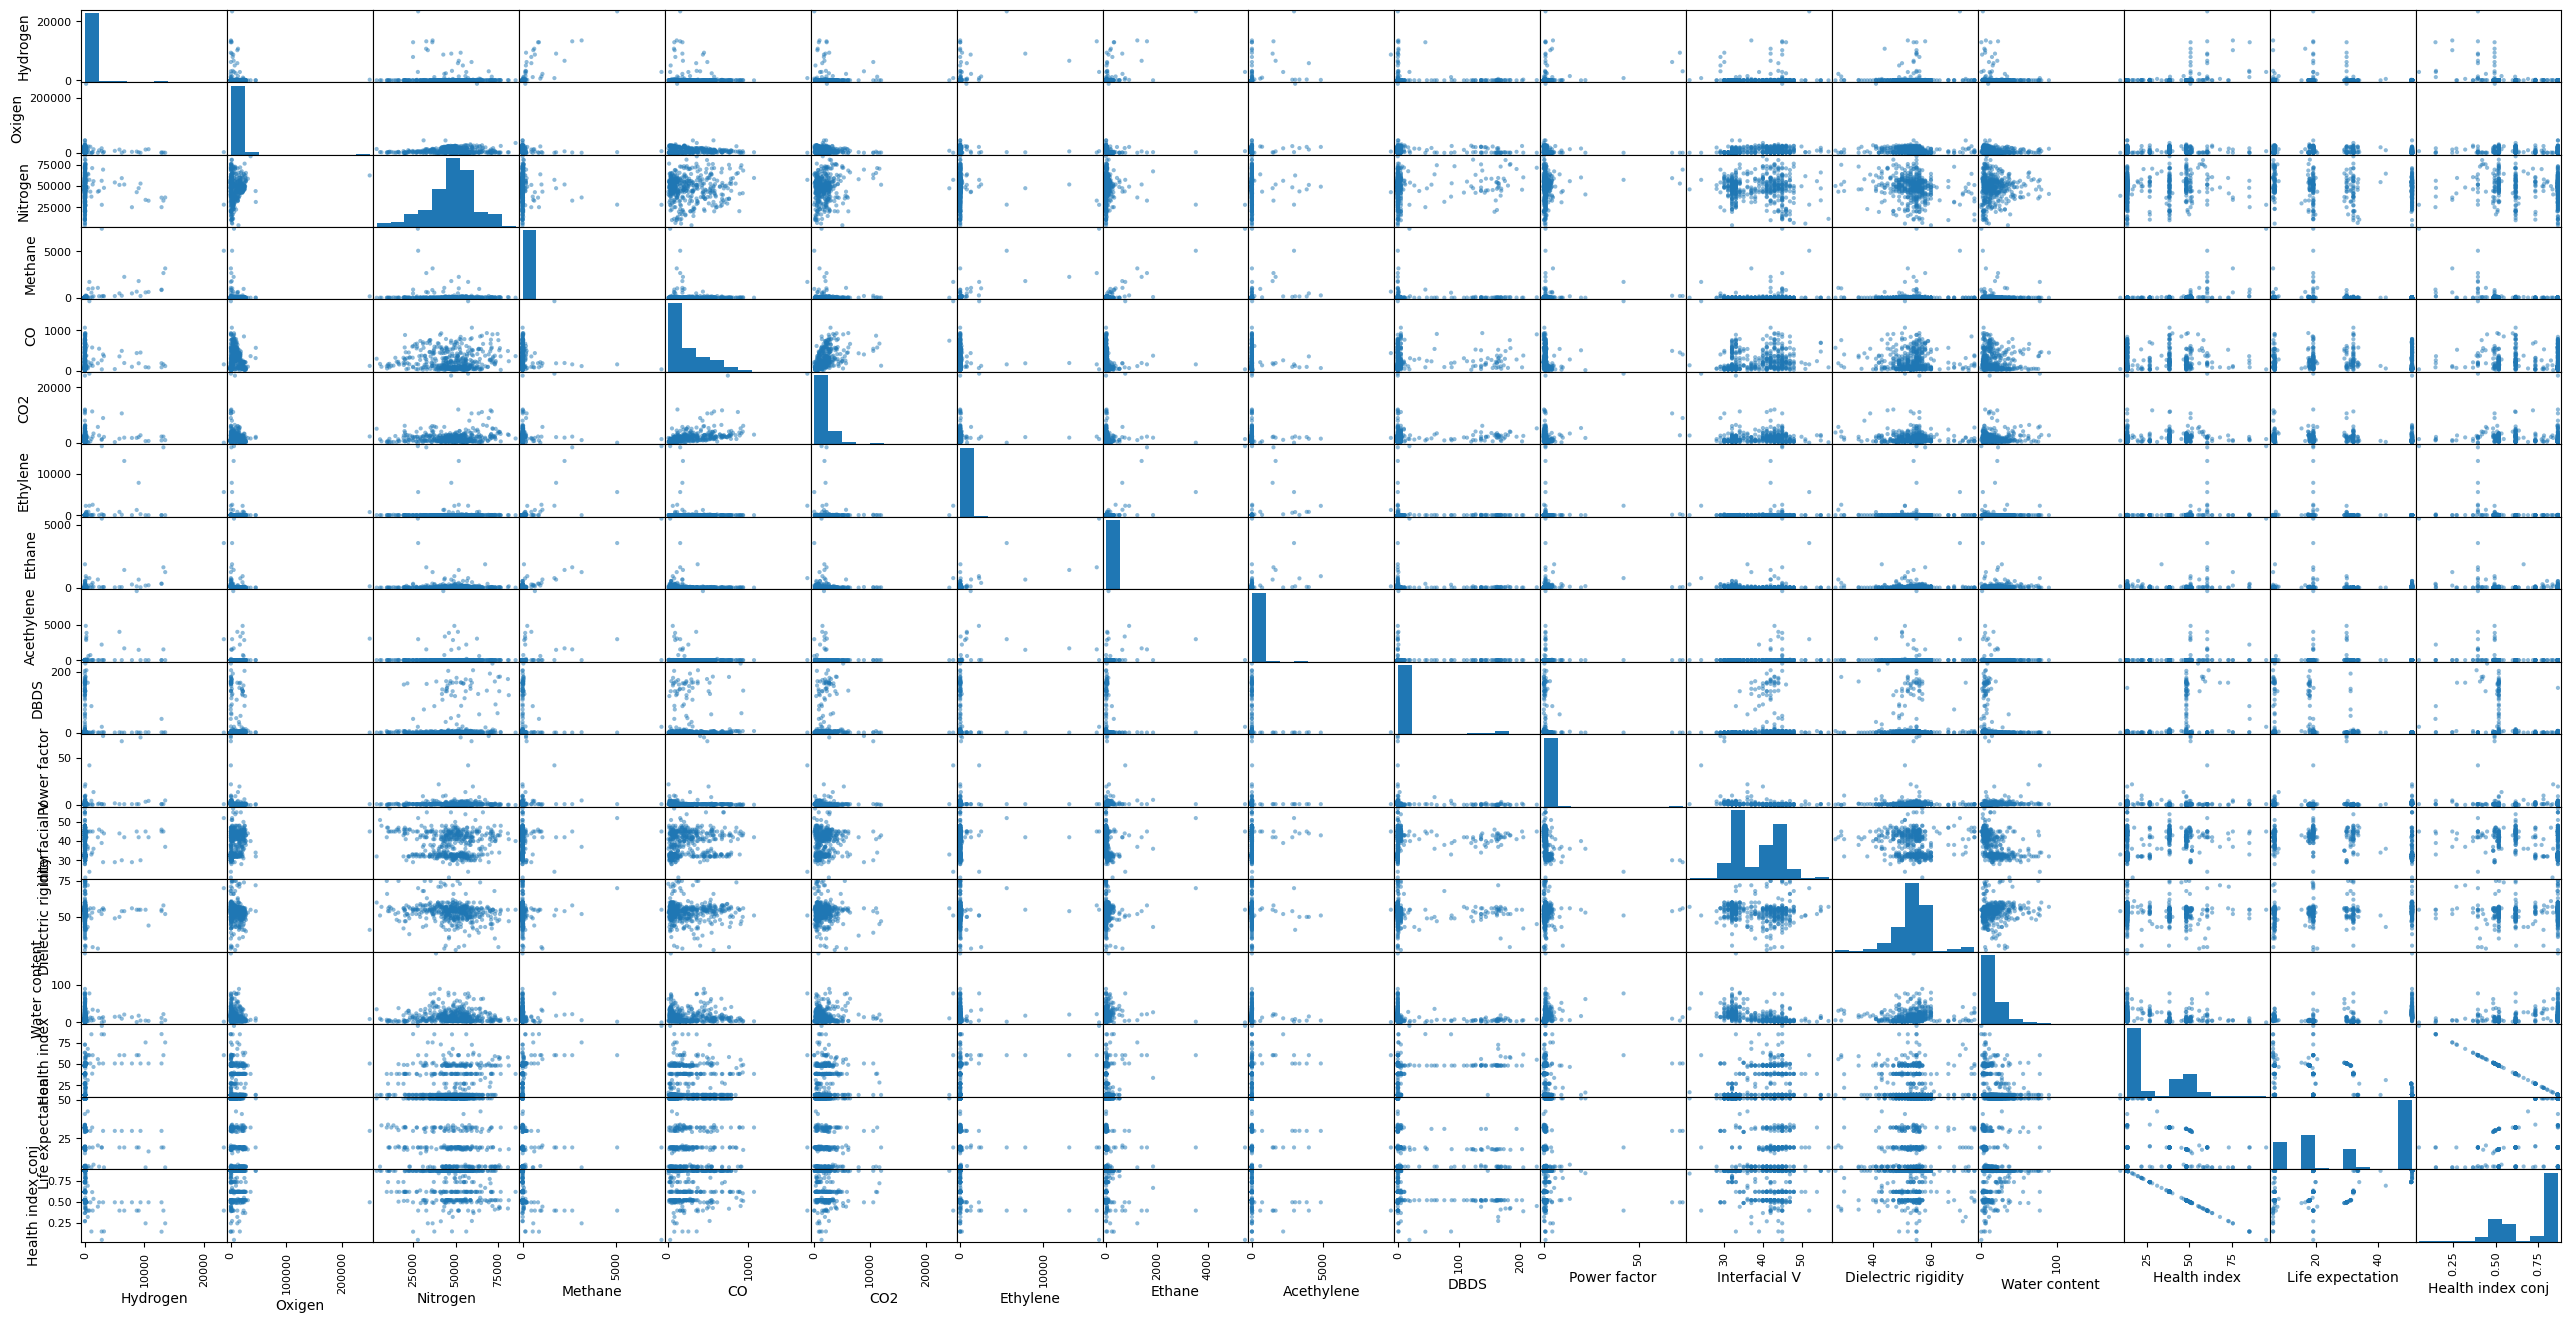

In [17]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(hlth_df, figsize=(32, 16), grid=True)
save_plot('All Data Pair Plot with Health Index Conjugate')

Imagem salva como: plots/Life expectation vs Health index conjugate.png


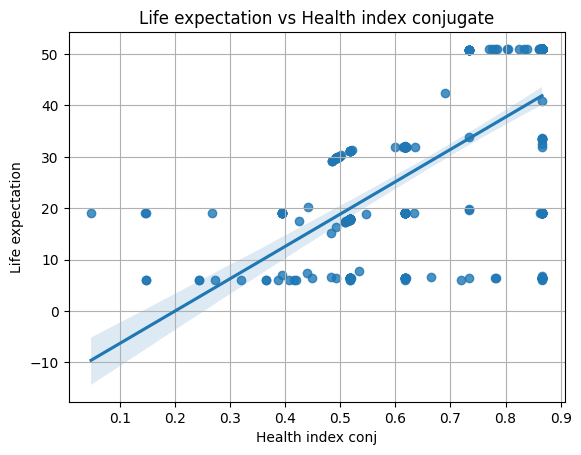

In [18]:
sns.regplot(x='Health index conj', y='Life expectation', data=hlth_df)
plt.title('Life expectation vs Health index conjugate')
plt.grid(True)
save_plot('Life expectation vs Health index conjugate')
plt.show()

As correlações com o **conjugado do índice de saúde** levam a crer que esse (o conjugado) é o valor real.

In [19]:
hlth_df['Health index'] = hlth_df['Health index conj']
hlth_df.drop(columns=['Health index conj'], inplace=True)

Imagem salva como: plots/Kendall Correlation Heatmap.png


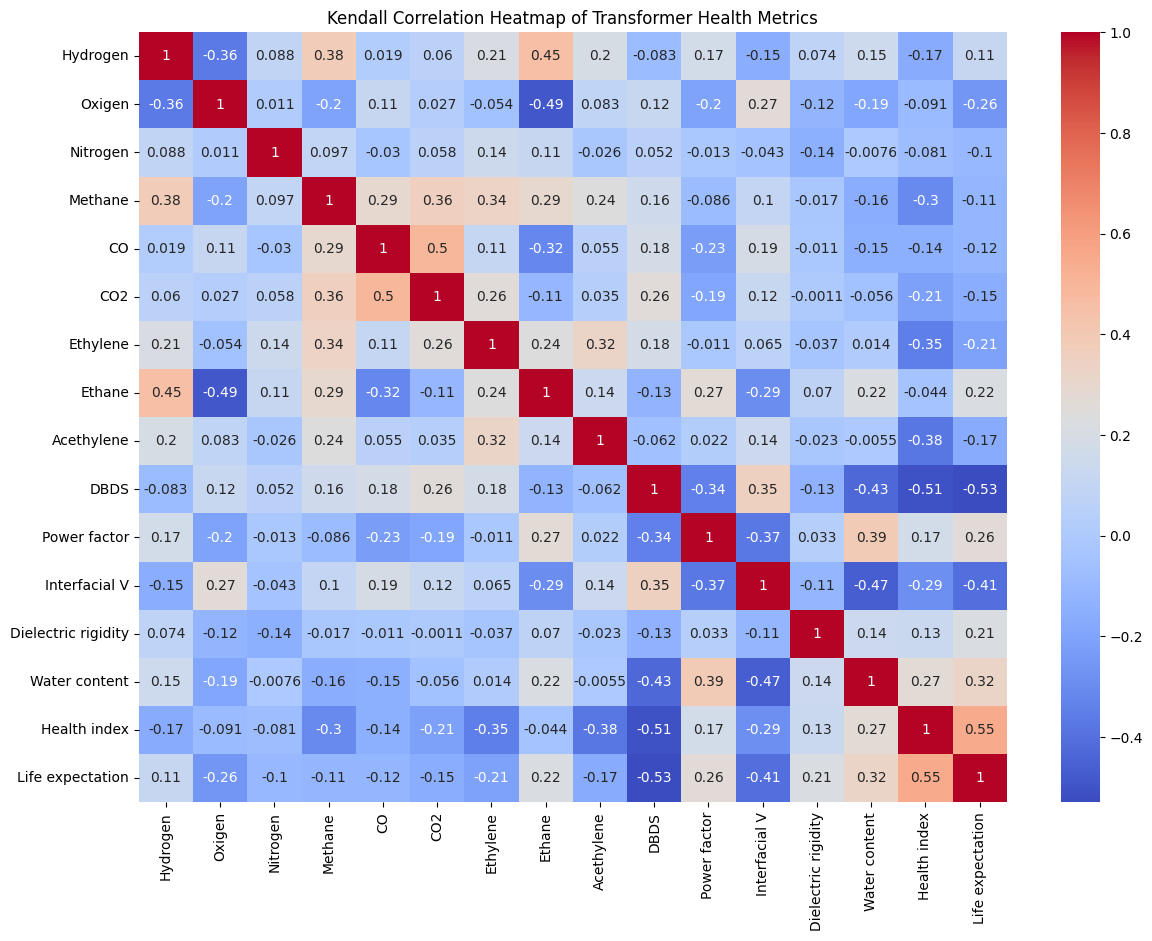

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(hlth_df.corr("kendall"), annot=True, cmap='coolwarm')
plt.title('Kendall Correlation Heatmap of Transformer Health Metrics')
save_plot('Kendall Correlation Heatmap')
plt.show()

Imagem salva como: plots/Spearman Correlation Heatmap.png


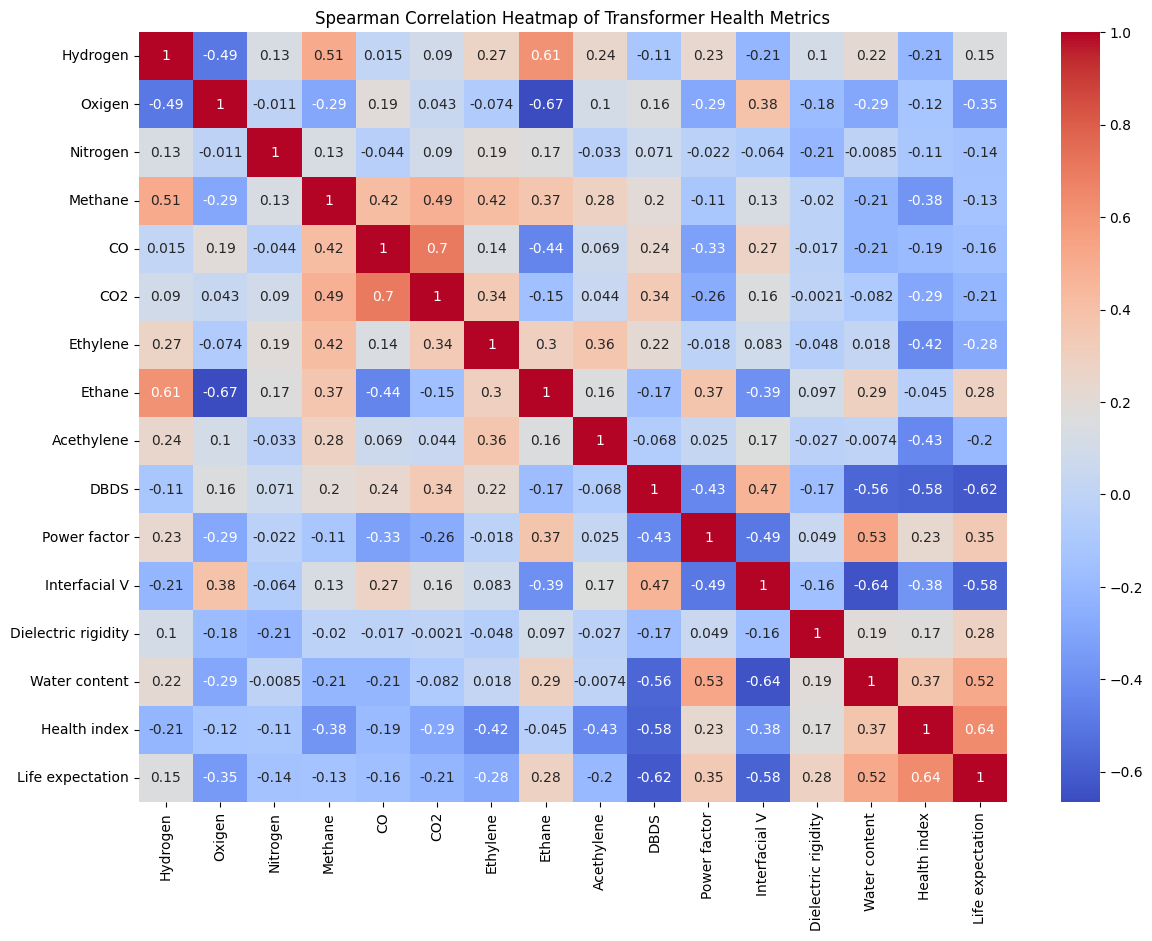

In [21]:
plt.figure(figsize=(14, 10))
sns.heatmap(hlth_df.corr("spearman"), annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap of Transformer Health Metrics')
save_plot('Spearman Correlation Heatmap')
plt.show()

Ao lidar com conjuntos de dados grandes e complexos, surgem alguns problemas:

1. **Dimensionalidade Alta**: Muitos dados podem conter variáveis irrelevantes ou redundantes que dificultam a análise e o desempenho dos modelos.
2. **Relações Complexas**: Nem todas as variáveis têm o mesmo impacto nas colunas alvo, tornando difícil identificar quais são realmente importantes.
3. **Overfitting**: Incluir variáveis desnecessárias pode aumentar o risco de overfitting, prejudicando a generalização do modelo.

Pra isso é necessário filtrar as variáveis mais importantes.

In [22]:
def find_top_k_features_to_targets(data, targets, k, correlation_type='pearson'):
    """
    Encontra as k variáveis que têm as melhores correlações com um conjunto de colunas alvo.

    Parâmetros:
    - data (pd.DataFrame): O conjunto de dados contendo as variáveis.
    - targets (lista de str): Os nomes das colunas alvo para calcular as correlações.
    - k (int): O número de variáveis principais a selecionar.
    - correlation_type (str): O tipo de correlação a ser calculado ('pearson', 'spearman', 'kendall').

    Retorna:
    - lista: Os nomes das k variáveis mais correlacionadas com as colunas alvo.
    """
    if correlation_type not in ['pearson', 'spearman', 'kendall']:
        raise ValueError("Invalid correlation_type. Choose from 'pearson', 'spearman', or 'kendall'.")
    
    # Garantir que as colunas alvo estão no conjunto de dados
    missing_targets = [col for col in targets if col not in data.columns]
    if missing_targets:
        raise ValueError(f"Target columns {missing_targets} are not present in the dataset.")
    
    # Calcular a matriz de correlação para o conjunto de dados completo
    corr_matrix = data.corr(method=correlation_type)
    
    # Filtrar a matriz de correlação para incluir apenas as colunas alvo
    target_corr = corr_matrix[targets]
    
    # Somar as correlações absolutas de cada variável em relação a todas as colunas alvo
    absolute_corr_sum = target_corr.abs().sum(axis=1)
    
    # Excluir as próprias colunas alvo de serem selecionadas
    absolute_corr_sum = absolute_corr_sum.drop(targets, errors='ignore')
    
    # Selecionar as top k variáveis com a maior soma das correlações absolutas
    top_k_features = absolute_corr_sum.nlargest(k).index.tolist()
    
    return top_k_features


Essa função resolve esses problemas ao:

1. **Selecionar as variáveis mais relevantes**: Identifica as variáveis mais correlacionadas com os alvos, ajudando a reduzir a dimensionalidade e focar no que realmente importa.
2. **Melhorar a performance do modelo**: Ao eliminar variáveis irrelevantes, o modelo tende a ter melhor desempenho, além de ser mais fácil de interpretar.
3. **Aprimorar a exploração de dados**: Facilita a compreensão das relações entre as variáveis e os alvos, proporcionando insights para ajustes ou novas hipóteses.
4. **Ajustar a análise de correlação**: Com diferentes tipos de correlação (Pearson, Spearman, Kendall), a função se adapta ao tipo de relação entre as variáveis e os alvos.


In [23]:
targets = ['Life expectation']
top_n = 7
top_correlated = find_top_k_features_to_targets(hlth_df, targets, top_n)
top_correlated

['Health index',
 'Interfacial V',
 'Water content',
 'DBDS',
 'Dielectric rigidity',
 'Oxigen',
 'CO2']

In [24]:
def plot_most_correlated_grid(df, top_correlated_columns):
    """
    Plota gráficos de regressão para as colunas mais correlacionadas, onde cada coluna é plotada
    contra todas as outras colunas na lista fornecida (excluindo ela mesma).

    Parâmetros:
    - df (pd.DataFrame): O conjunto de dados contendo as variáveis.
    - top_correlated_columns (lista de str): Uma lista de nomes de variáveis representando as colunas mais correlacionadas.
    """
    # Gerar todos os pares de colunas (cada coluna com cada outra, excluindo ela mesma)
    column_pairs = [(col1, col2) for i, col1 in enumerate(top_correlated_columns) 
                    for j, col2 in enumerate(top_correlated_columns) if i != j]

    # Remover duplicatas dos pares (ordem não importa)
    unique_pairs = []
    seen = set()
    for col1, col2 in column_pairs:
        if (col1, col2) not in seen and (col2, col1) not in seen:
            unique_pairs.append((col1, col2))
            seen.add((col1, col2))

    # Determinar o tamanho da grade
    n = len(unique_pairs)
    grid_size = int(math.ceil(math.sqrt(n)))

    fig, axes = plt.subplots(grid_size, grid_size, figsize=(5 * grid_size, 5 * grid_size))
    axes = axes.flatten()  

    for ax, (feature1, feature2) in zip(axes, unique_pairs):
        sns.regplot(x=feature1, y=feature2, data=df, ax=ax)
        ax.set_title(f'{feature1} vs {feature2}')
        ax.grid()

    # Remover subgráficos não utilizados caso o número de gráficos não preencha exatamente a grade
    for i in range(len(unique_pairs), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()



Imagem salva como: plots/7 Most Correlated Features with the Target.png


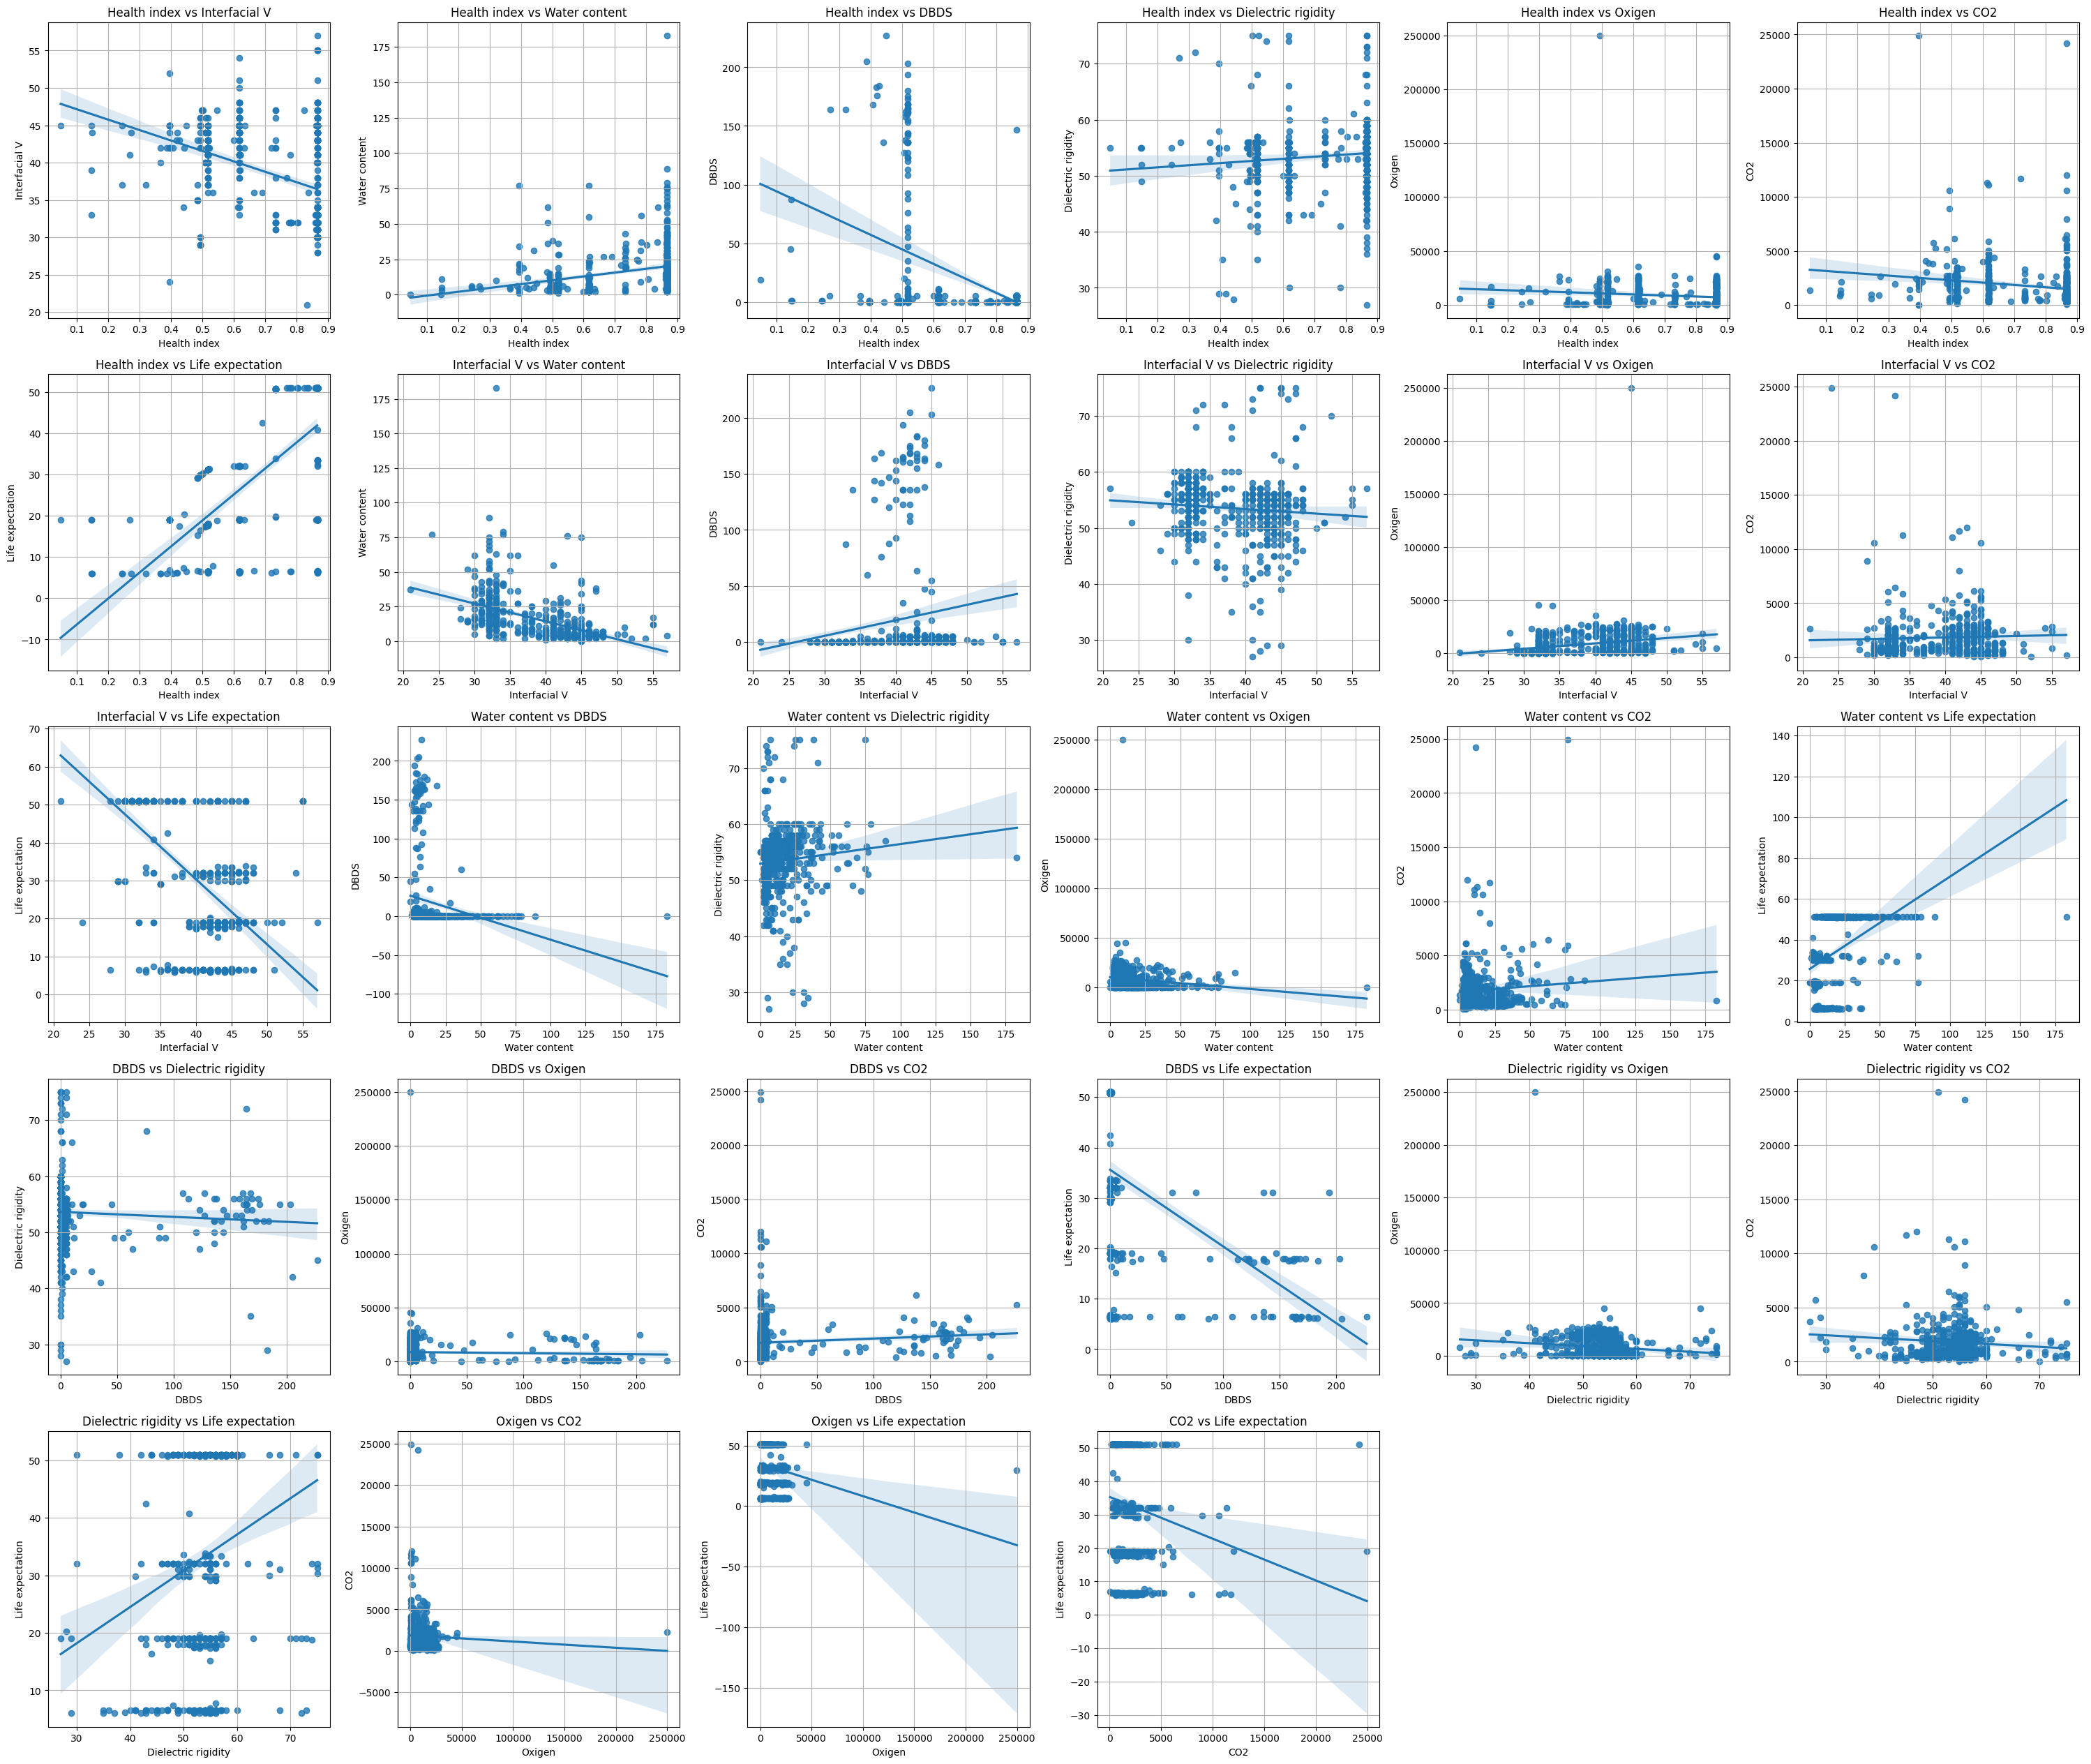

In [24]:
plot_most_correlated_grid(hlth_df, top_correlated + targets)
save_plot(f'{top_n} Most Correlated Features with the Target')
plt.show()

Como citado anteriormente a ***alta dimensionalidade***, ***informações irrelevantes***, ***redundância e complexidade*** podem dificultar a construção de modelos preditivos eficazes, pois muitas variáveis podem não agregar valor à previsão ou até prejudicar a performance, tornando o modelo mais lento e propenso a overfitting.

## Engenharia de Atributos (recursos) 

Uma solução eficiente para esses desafios é a **engenharia de recursos (feature engineering)**. A engenharia de recursos envolve o processo de **seleção**, **extração** e **criação** de novas variáveis a partir das originais, com o objetivo de melhorar o desempenho dos modelos preditivos. Essa prática tem três principais abordagens:

1. **Seleção de Características**: Identificar quais variáveis são mais relevantes para o modelo, removendo aquelas que são redundantes ou irrelevantes. Isso pode ser feito através de técnicas estatísticas, como a análise de correlação, ou com base no conhecimento do domínio.
   
2. **Extração de Características**: Criar novas variáveis a partir das originais, como combinar informações existentes para gerar novos insights. Por exemplo, em dados sobre gases, é possível criar novas variáveis que representam a razão entre dois ou mais gases, o que pode fornecer mais informações relevantes para o modelo.

3. **Criação de Características**: Gerar variáveis completamente novas que podem capturar padrões importantes, como transformações matemáticas ou combinações de variáveis existentes.

O principal objetivo da engenharia de recursos é aprimorar a **potência preditiva** do modelo, criando um conjunto de dados mais limpo, conciso e informativo, que facilite a aprendizagem do modelo e melhore sua capacidade de generalização. Ao realizar essa engenharia, é possível transformar dados brutos em informações valiosas, tornando os modelos mais eficazes e com maior capacidade de fazer previsões precisas.

#### Combinações para Criar Novas Características  
Existem diversas formas de combinar os dados originais para criar variáveis que capturam informações mais relevantes e úteis para o modelo. Algumas combinações incluem:

---

**1. Operações Aritméticas**  
- **Soma e Subtração**: Capturam tendências gerais (e.g., somar dois gases para medir a concentração total).  
- **Multiplicação e Divisão**: Podem destacar relações entre variáveis (e.g., calcular a razão entre gases para identificar proporções críticas).  

---

**2. Estatísticas Agregadas**  
- **Média, Mediana e Desvio Padrão**: Representam propriedades gerais de um grupo de variáveis, como o comportamento médio ou a dispersão.  
- **Máximo e Mínimo**: Destacam extremos que podem sinalizar anomalias.

---

**3. Transformações Matemáticas**  
- **Logarítmica**: Útil para dados assimétricos ou com ampla faixa de valores.  
- **Exponencial**: Amplifica diferenças sutis em valores baixos.  
- **Potências e Raízes**: Ajustam a escala de variáveis.  

---

**4. Relações Temporais e Diferenças**  
- **Taxas de Variação**: Diferença entre variáveis ao longo do tempo ou espaço (e.g., concentração atual - anterior).  
- **Tendências**: Modelam o comportamento de longo prazo (e.g., aceleração ou desaceleração de concentrações).  

---

**5. Interações Entre Variáveis**  
- **Interações Cruzadas**: Multiplicação ou divisão de duas ou mais variáveis para capturar interdependências.  
- **Polinômios**: Elevando variáveis à potência ou combinando múltiplas variáveis em polinômios.

---


In [25]:
column_pairs = [(col1, col2) for i, col1 in enumerate(top_correlated) 
                    for j, col2 in enumerate(top_correlated) if i != j]

column_pairs = set(tuple(sorted((col1, col2))) for col1, col2 in column_pairs)


column_pairs = list(column_pairs)

column_pairs

[('Dielectric rigidity', 'Interfacial V'),
 ('DBDS', 'Interfacial V'),
 ('DBDS', 'Water content'),
 ('Dielectric rigidity', 'Water content'),
 ('CO2', 'Health index'),
 ('CO2', 'Oxigen'),
 ('Interfacial V', 'Oxigen'),
 ('CO2', 'DBDS'),
 ('Health index', 'Oxigen'),
 ('DBDS', 'Dielectric rigidity'),
 ('CO2', 'Interfacial V'),
 ('CO2', 'Water content'),
 ('Interfacial V', 'Water content'),
 ('DBDS', 'Health index'),
 ('Dielectric rigidity', 'Health index'),
 ('DBDS', 'Oxigen'),
 ('Dielectric rigidity', 'Oxigen'),
 ('Health index', 'Interfacial V'),
 ('Health index', 'Water content'),
 ('Oxigen', 'Water content'),
 ('CO2', 'Dielectric rigidity')]

##### Vantagens da Média Geométrica em Dados Exclusivamente Positivos  
A **média geométrica** é uma ferramenta útil para criar características quando as variáveis envolvidas têm valores exclusivamente positivos. Ela é definida como a raiz n-ésima do produto dos valores, o que traz várias vantagens:  

1. **Sensibilidade Proporcional**: Diferentemente da média aritmética, a média geométrica é mais influenciada por relações proporcionais do que por somas absolutas. Isso a torna ideal para dados onde os valores crescem ou decrescem em taxas diferentes (e.g., razões entre gases).  

2. **Redução do Impacto de Outliers**: Como a média geométrica usa o produto dos valores, ela reduz o impacto de valores extremos em relação à média aritmética, tornando-a mais robusta em cenários de dados assimétricos.  

3. **Representação Equilibrada**: Quando combinada com variáveis de escalas diferentes, ela proporciona uma representação balanceada, sem que uma variável domine a combinação devido a seu valor absoluto.  

4. **Significado Multiplicativo**: A média geométrica captura o crescimento combinado de variáveis, sendo útil em contextos onde a interpretação multiplicativa faz mais sentido do que a soma.  


---


In [26]:
enhancend_hlth_df = hlth_df.copy()
for (feat1, feat2) in column_pairs:
    enhancend_hlth_df[feat1 + '_' + feat2 + '_geoavg'] = np.sqrt(hlth_df[feat1] * hlth_df[feat2]) # Calcula a média geométrica de duas variáveis e adiciona a based de dados, que fica enriquecida.
    if feat1 in enhancend_hlth_df.columns:
        enhancend_hlth_df.drop(columns=feat1, inplace=True)
    elif feat2 in enhancend_hlth_df.columns:
        enhancend_hlth_df.drop(columns=feat2, inplace=True)

In [27]:
enhancend_hlth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Hydrogen                                  470 non-null    int64  
 1   Nitrogen                                  470 non-null    int64  
 2   Methane                                   470 non-null    int64  
 3   CO                                        470 non-null    int64  
 4   Ethylene                                  470 non-null    int64  
 5   Ethane                                    470 non-null    int64  
 6   Acethylene                                470 non-null    int64  
 7   Power factor                              470 non-null    float64
 8   Life expectation                          470 non-null    float64
 9   Dielectric rigidity_Interfacial V_geoavg  470 non-null    float64
 10  DBDS_Interfacial V_geoavg             

In [28]:
enhancend_hlth_df.tail()

Hydrogen  Nitrogen  Methane   CO  Ethylene  Ethane  Acethylene  \
465        15     52900        3   60         3      84           0   
466        15     47100        3   64         3     108           0   
467        15     35000        2  675         0       0           0   
468        15     50600        5   77         0      72           0   
469        15     39700        3   64         5      27           0   

     Power factor  Life expectation  Dielectric rigidity_Interfacial V_geoavg  \
465          1.00              51.0                                 42.332021   
466          1.00              51.0                                 41.952354   
467          0.30               6.5                                 51.088159   
468          1.21              51.0                                 42.213742   
469          1.00              51.0                                 43.817805   

     ...  CO2_Water content_geoavg  Interfacial V_Water content_geoavg  \
465  ...                154.544492                           29.933259   
466  ...                 86.394444                           19.595918   
467  ...                142.267354                           18.973666   
468  ...                 76.498366                           19.052559   
469  ...                102.264363                           24.000000   

     DBDS_Health index_geoavg  Dielectric rigidity_Health index_geoavg  \
465                  0.000000                                 6.963907   
466                  0.000000                                 6.901449   
467                  2.080865                                 7.087172   
468                  0.000000                                 6.838421   
469                  0.000000                                 7.208329   

     DBDS_Oxigen_geoavg  Dielectric rigidity_Oxigen_geoavg  \
465                 0.0                         112.747506   
466                 0.0                         135.535973   
467                80.0                         272.470182   
468                 0.0                          95.530100   
469                 0.0                         135.941164   

     Health index_Interfacial V_geoavg  Health index_Water content_geoavg  \
465                           5.264219                           4.924226   
466                           5.264219                           3.223663   
467                           6.242596                           2.632109   
468                           5.345840                           3.086422   
469                           5.264219                           3.948164   

     Oxigen_Water content_geoavg  CO2_Dielectric rigidity_geoavg  
465                    79.724526                      218.558917  
466                    63.308767                      184.959455  
467                   101.192885                      383.066574  
468                    43.116122                      169.493363  
469                    74.458042                      186.708329  

[5 rows x 30 columns]

Checando por valores inválidos:

In [29]:
np.argwhere(list(map(lambda x: x in [float('inf'), np.nan], enhancend_hlth_df .to_numpy().flatten())))

array([], shape=(0, 1), dtype=int64)

Imagem salva como: plots/Correlation Heatmap of Transformer Health Metrics with New Features.png


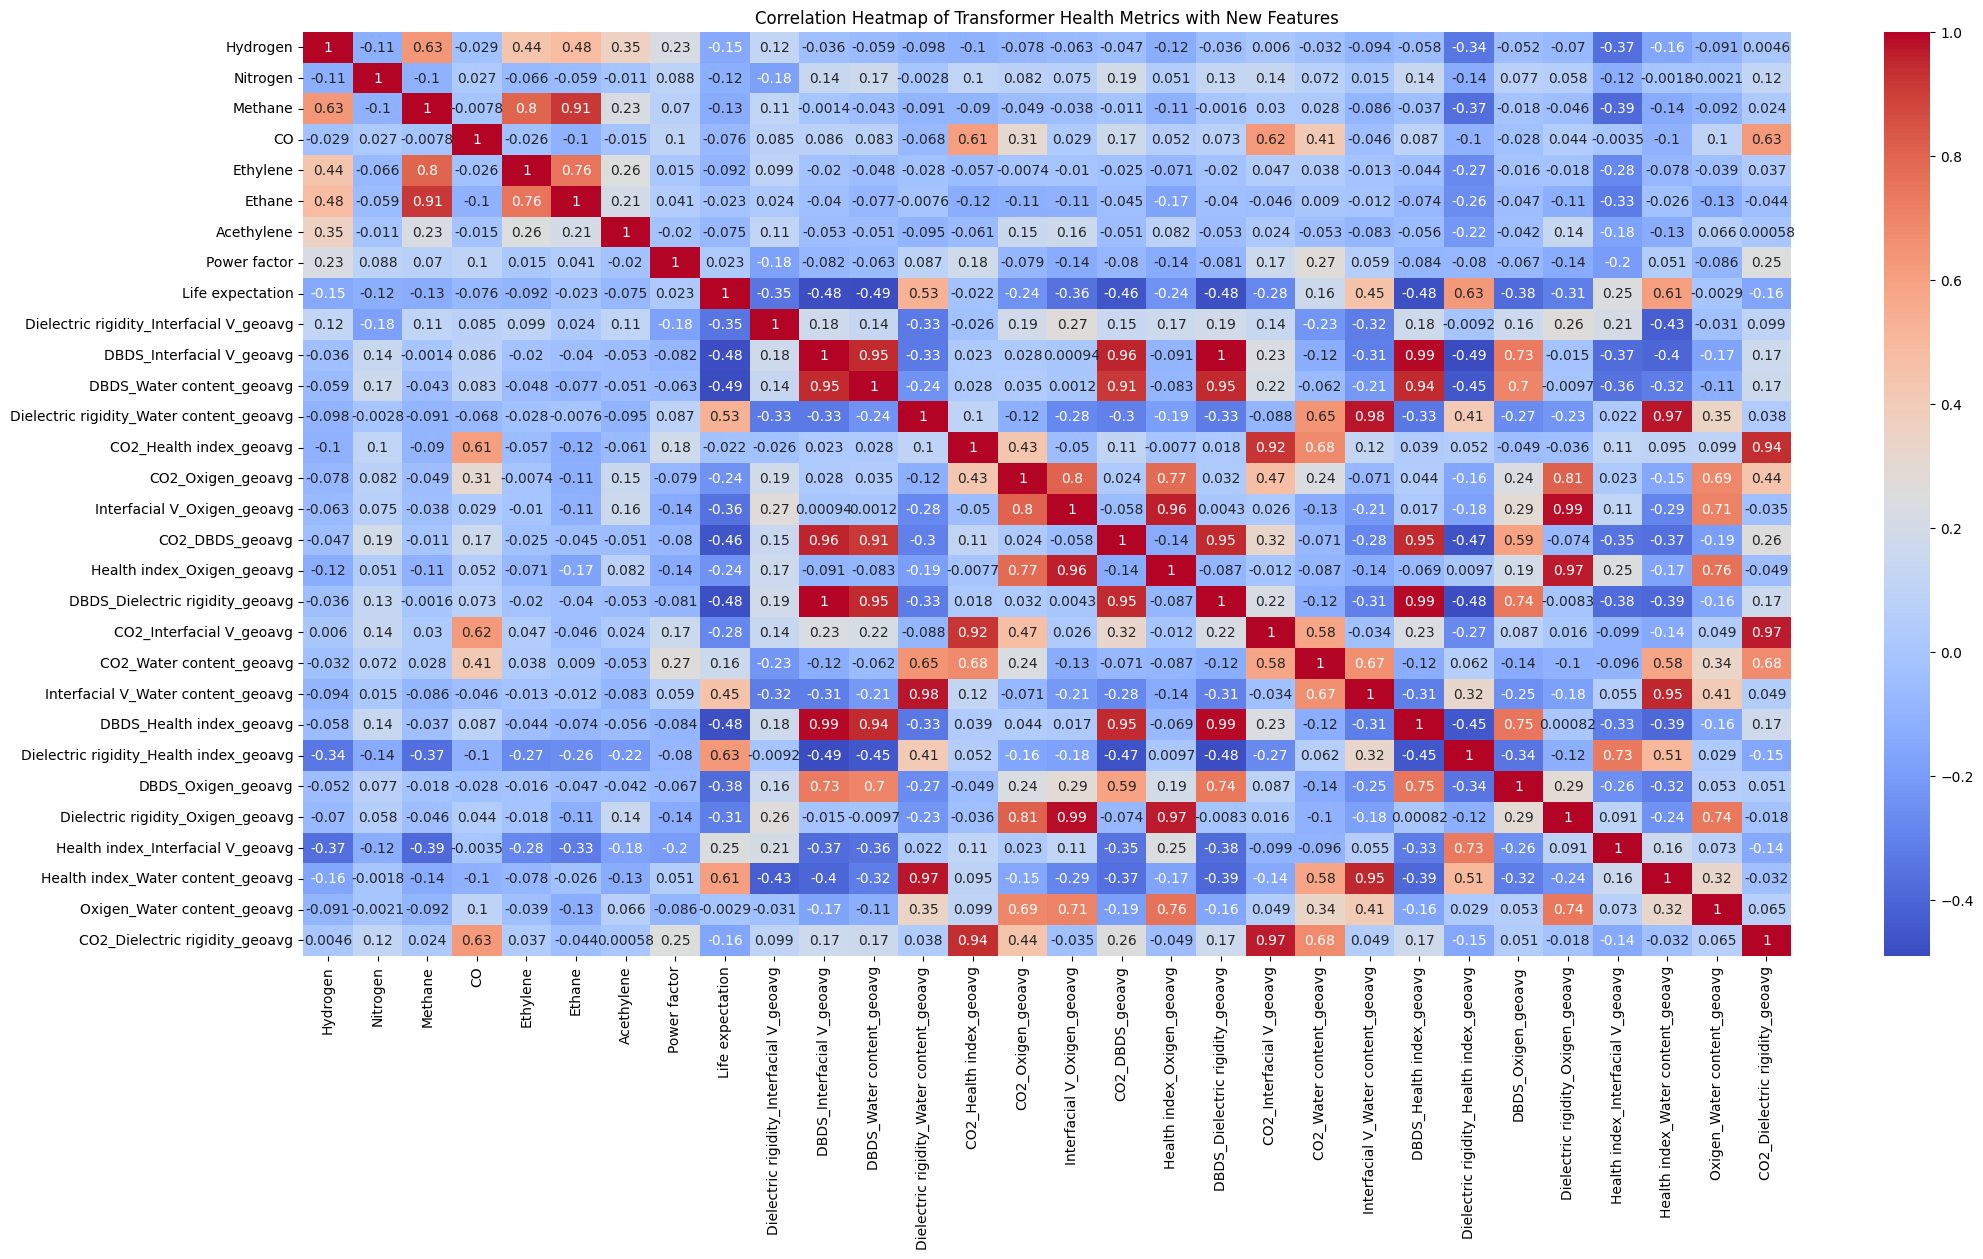

In [30]:
plt.figure(figsize=(24, 12))
sns.heatmap(enhancend_hlth_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Transformer Health Metrics with New Features')
save_plot('Correlation Heatmap of Transformer Health Metrics with New Features')
plt.show()

In [31]:
new_top_correlated = find_top_k_features_to_targets(enhancend_hlth_df, targets, top_n)
new_top_correlated

['Dielectric rigidity_Health index_geoavg',
 'Health index_Water content_geoavg',
 'Dielectric rigidity_Water content_geoavg',
 'DBDS_Water content_geoavg',
 'DBDS_Interfacial V_geoavg',
 'DBDS_Health index_geoavg',
 'DBDS_Dielectric rigidity_geoavg']

As novas características dominam agora a correlação com a saída. Mostram também ter correlação de forma muito mais distribuída e equilibrada em relação as variáveis que as compõem, o que pode fazer com que o modelo déia resultados muito mais precisos.

Imagem salva como: plots/7 Most Correlated Features with the Target Adding New Features.png


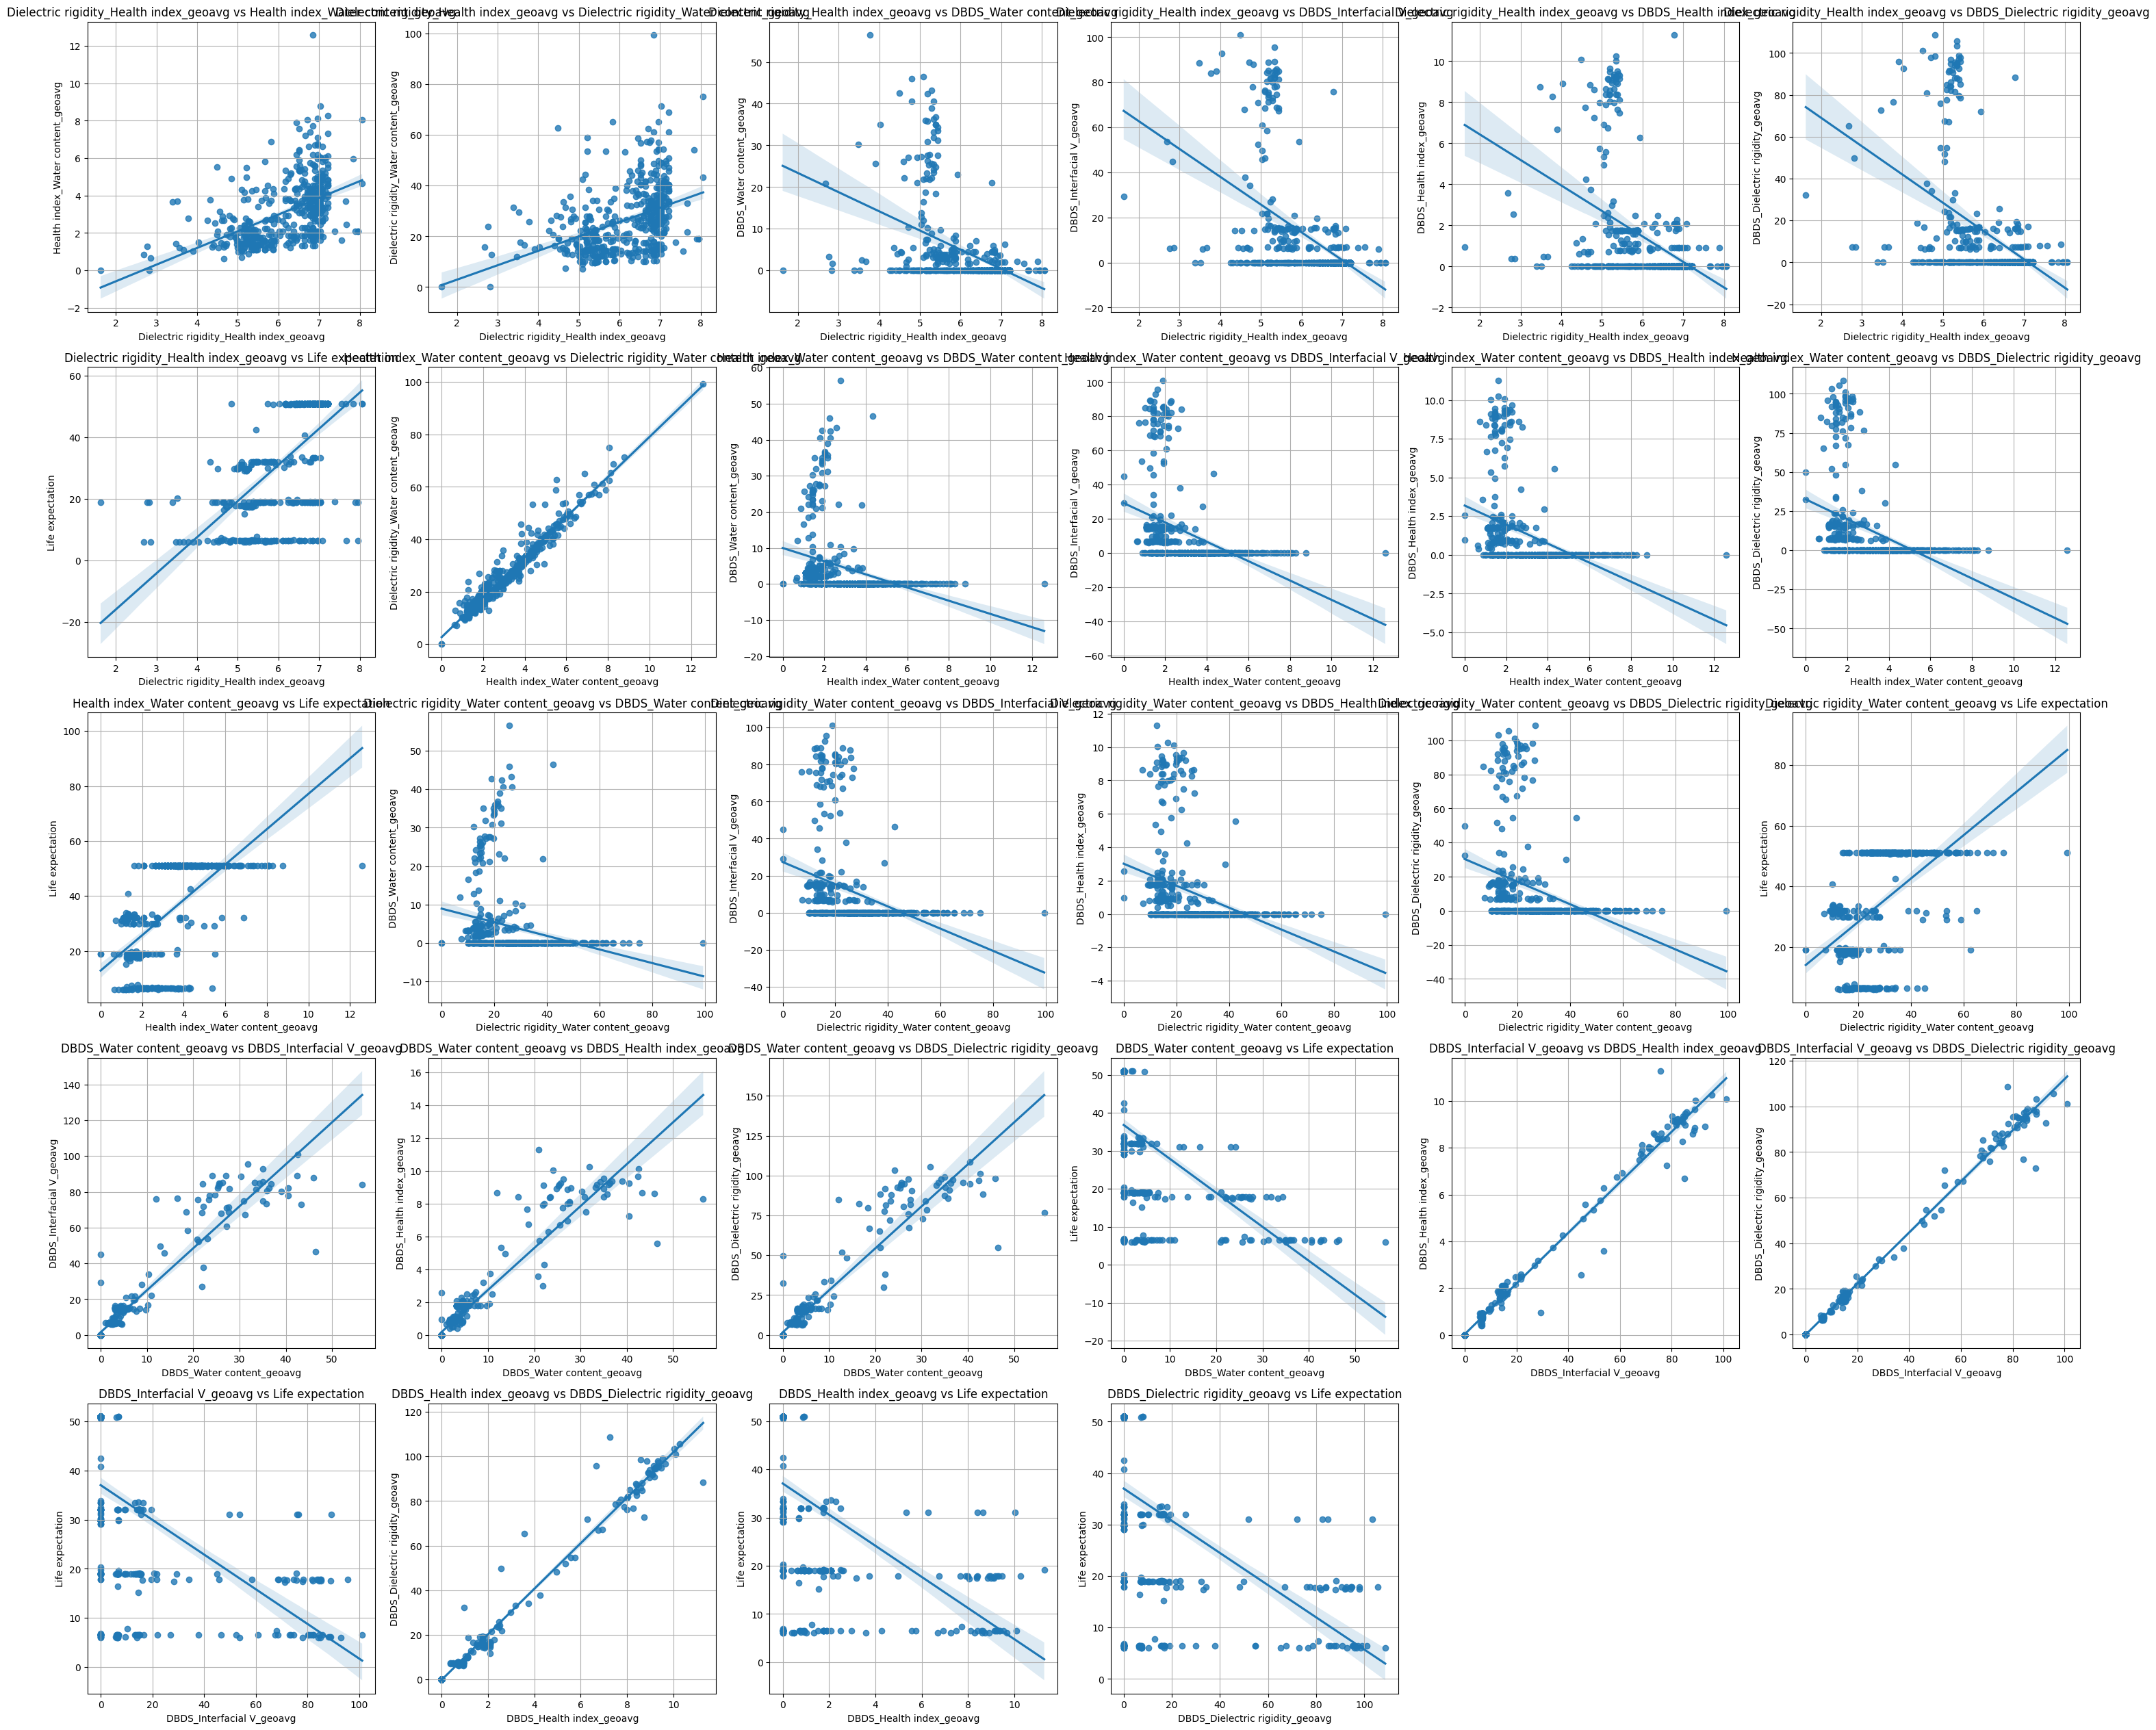

In [32]:
plot_most_correlated_grid(enhancend_hlth_df, new_top_correlated + targets)
save_plot(f'{top_n} Most Correlated Features with the Target Adding New Features')
plt.show()

Vamos trabalhar com os 12 melhores atributos para melhor robustez:

In [35]:
top_n = 12
input_df = enhancend_hlth_df[find_top_k_features_to_targets(enhancend_hlth_df, targets, top_n)].copy()

In [36]:
input_df.tail()

Dielectric rigidity_Health index_geoavg  \
465                                 6.963907   
466                                 6.901449   
467                                 7.087172   
468                                 6.838421   
469                                 7.208329   

     Health index_Water content_geoavg  \
465                           4.924226   
466                           3.223663   
467                           2.632109   
468                           3.086422   
469                           3.948164   

     Dielectric rigidity_Water content_geoavg  DBDS_Water content_geoavg  \
465                                 39.597980                   0.000000   
466                                 25.690465                   0.000000   
467                                 21.540659                   6.324555   
468                                 24.372115                   0.000000   
469                                 32.863353                   0.000000   

     DBDS_Interfacial V_geoavg  DBDS_Health index_geoavg  \
465                        0.0                  0.000000   
466                        0.0                  0.000000   
467                       15.0                  2.080865   
468                        0.0                  0.000000   
469                        0.0                  0.000000   

     DBDS_Dielectric rigidity_geoavg  CO2_DBDS_geoavg  \
465                         0.000000         0.000000   
466                         0.000000         0.000000   
467                        17.029386       112.472219   
468                         0.000000         0.000000   
469                         0.000000         0.000000   

     Interfacial V_Water content_geoavg  DBDS_Oxigen_geoavg  \
465                           29.933259                 0.0   
466                           19.595918                 0.0   
467                           18.973666                80.0   
468                           19.052559                 0.0   
469                           24.000000                 0.0   

     Interfacial V_Oxigen_geoavg  Dielectric rigidity_Interfacial V_geoavg  
465                    85.229103                                 42.332021  
466                   103.382784                                 41.952354  
467                   240.000000                                 51.088159  
468                    74.679314                                 42.213742  
469                    99.277389                                 43.817805

Embora haja melhor equilíbrio agora, ainda existem valores muito fora das faixas normais. Esses são ***outliers***. Remove-los proporciona dados mais limpos, e consequentemnte maior precisão e robustez.

In [37]:
from scipy import stats

for col in input_df:
    z_scores = stats.zscore(input_df[col])
    outliers = input_df[(z_scores > 3) | (z_scores < -3)]
    print(f"Outliers em {col}: {len(outliers)}")

Outliers em Dielectric rigidity_Health index_geoavg: 5
Outliers em Health index_Water content_geoavg: 3
Outliers em Dielectric rigidity_Water content_geoavg: 4
Outliers em DBDS_Water content_geoavg: 18
Outliers em DBDS_Interfacial V_geoavg: 17
Outliers em DBDS_Health index_geoavg: 16
Outliers em DBDS_Dielectric rigidity_geoavg: 19
Outliers em CO2_DBDS_geoavg: 19
Outliers em Interfacial V_Water content_geoavg: 5
Outliers em DBDS_Oxigen_geoavg: 15
Outliers em Interfacial V_Oxigen_geoavg: 1
Outliers em Dielectric rigidity_Interfacial V_geoavg: 4


In [38]:
outlier_idxs = []
for col in input_df:
    z_scores = stats.zscore(input_df[col])
    outlier_idxs.extend(list(input_df[(z_scores > 3) | (z_scores < -3)].index))
outlier_idxs = list(set(outlier_idxs))

In [39]:
len(outlier_idxs)

56

In [40]:
input_df.drop(outlier_idxs, inplace=True)

In [41]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 5 to 469
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Dielectric rigidity_Health index_geoavg   414 non-null    float64
 1   Health index_Water content_geoavg         414 non-null    float64
 2   Dielectric rigidity_Water content_geoavg  414 non-null    float64
 3   DBDS_Water content_geoavg                 414 non-null    float64
 4   DBDS_Interfacial V_geoavg                 414 non-null    float64
 5   DBDS_Health index_geoavg                  414 non-null    float64
 6   DBDS_Dielectric rigidity_geoavg           414 non-null    float64
 7   CO2_DBDS_geoavg                           414 non-null    float64
 8   Interfacial V_Water content_geoavg        414 non-null    float64
 9   DBDS_Oxigen_geoavg                        414 non-null    float64
 10  Interfacial V_Oxigen_geoavg               4

Imagem salva como: plots/Correlation Heatmap of Transformer Health Metrics with the Best 12 Features and without outliers.png


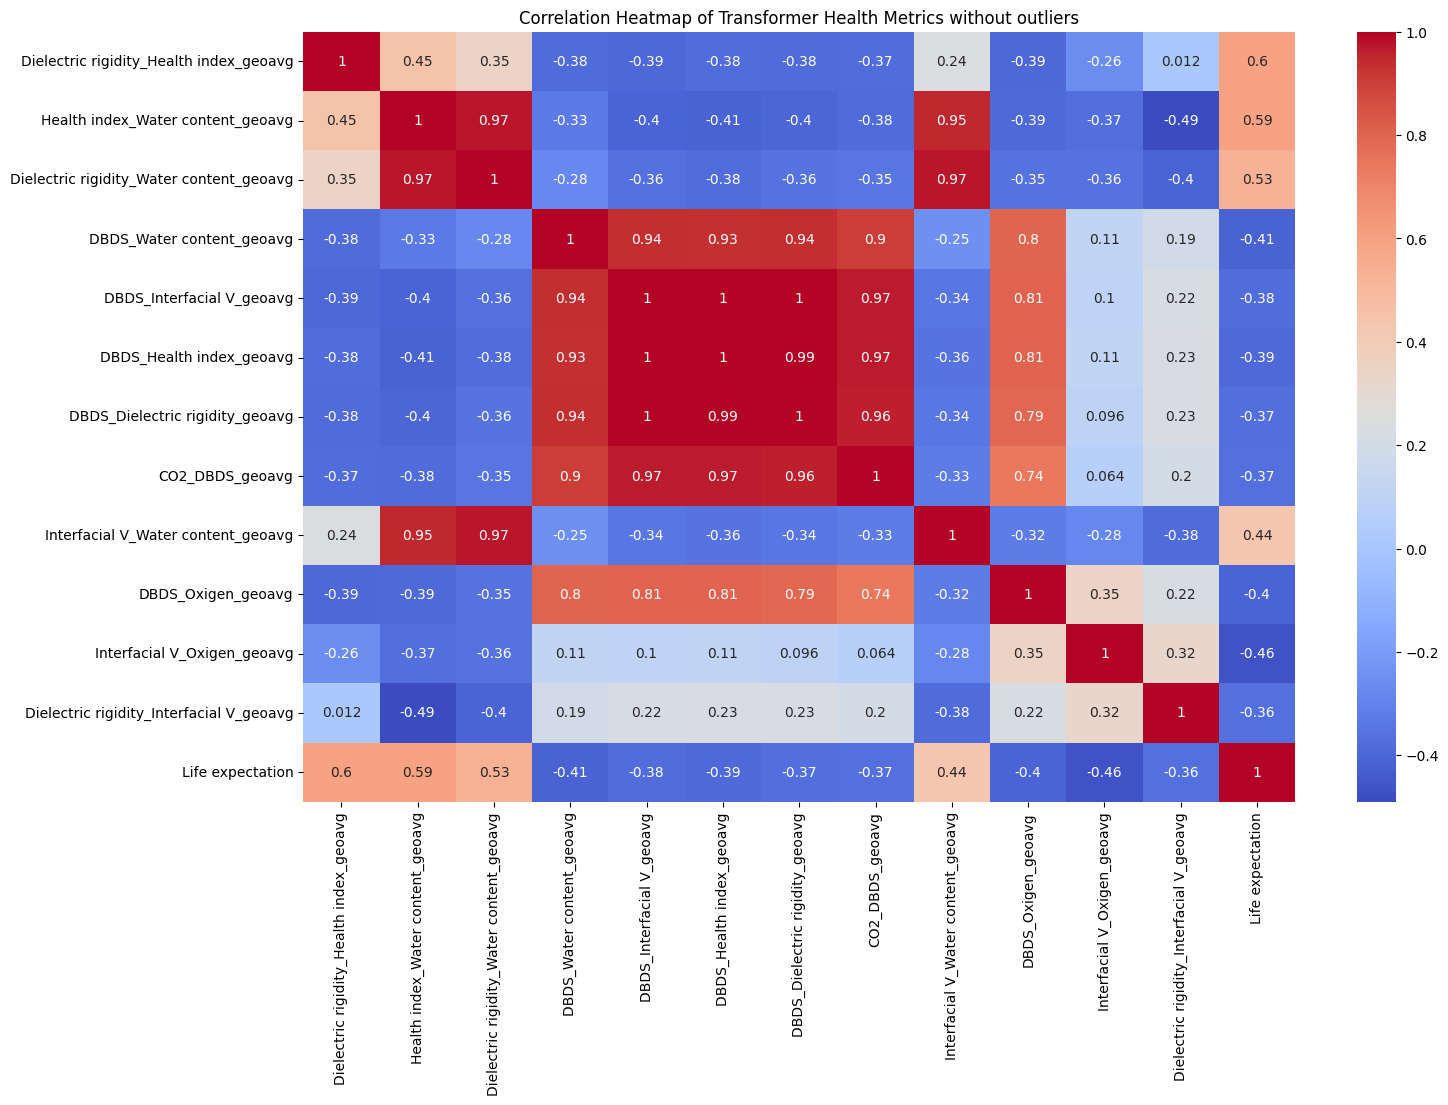

In [42]:
plt.figure(figsize=(16, 10))
sns.heatmap(pd.concat([input_df, enhancend_hlth_df.loc[input_df.index][targets]], axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Transformer Health Metrics without outliers')
save_plot('Correlation Heatmap of Transformer Health Metrics with the Best 12 Features and without outliers')
plt.show()

Imagem salva como: plots/12 Most Correlated Features with the Target without outliers.png


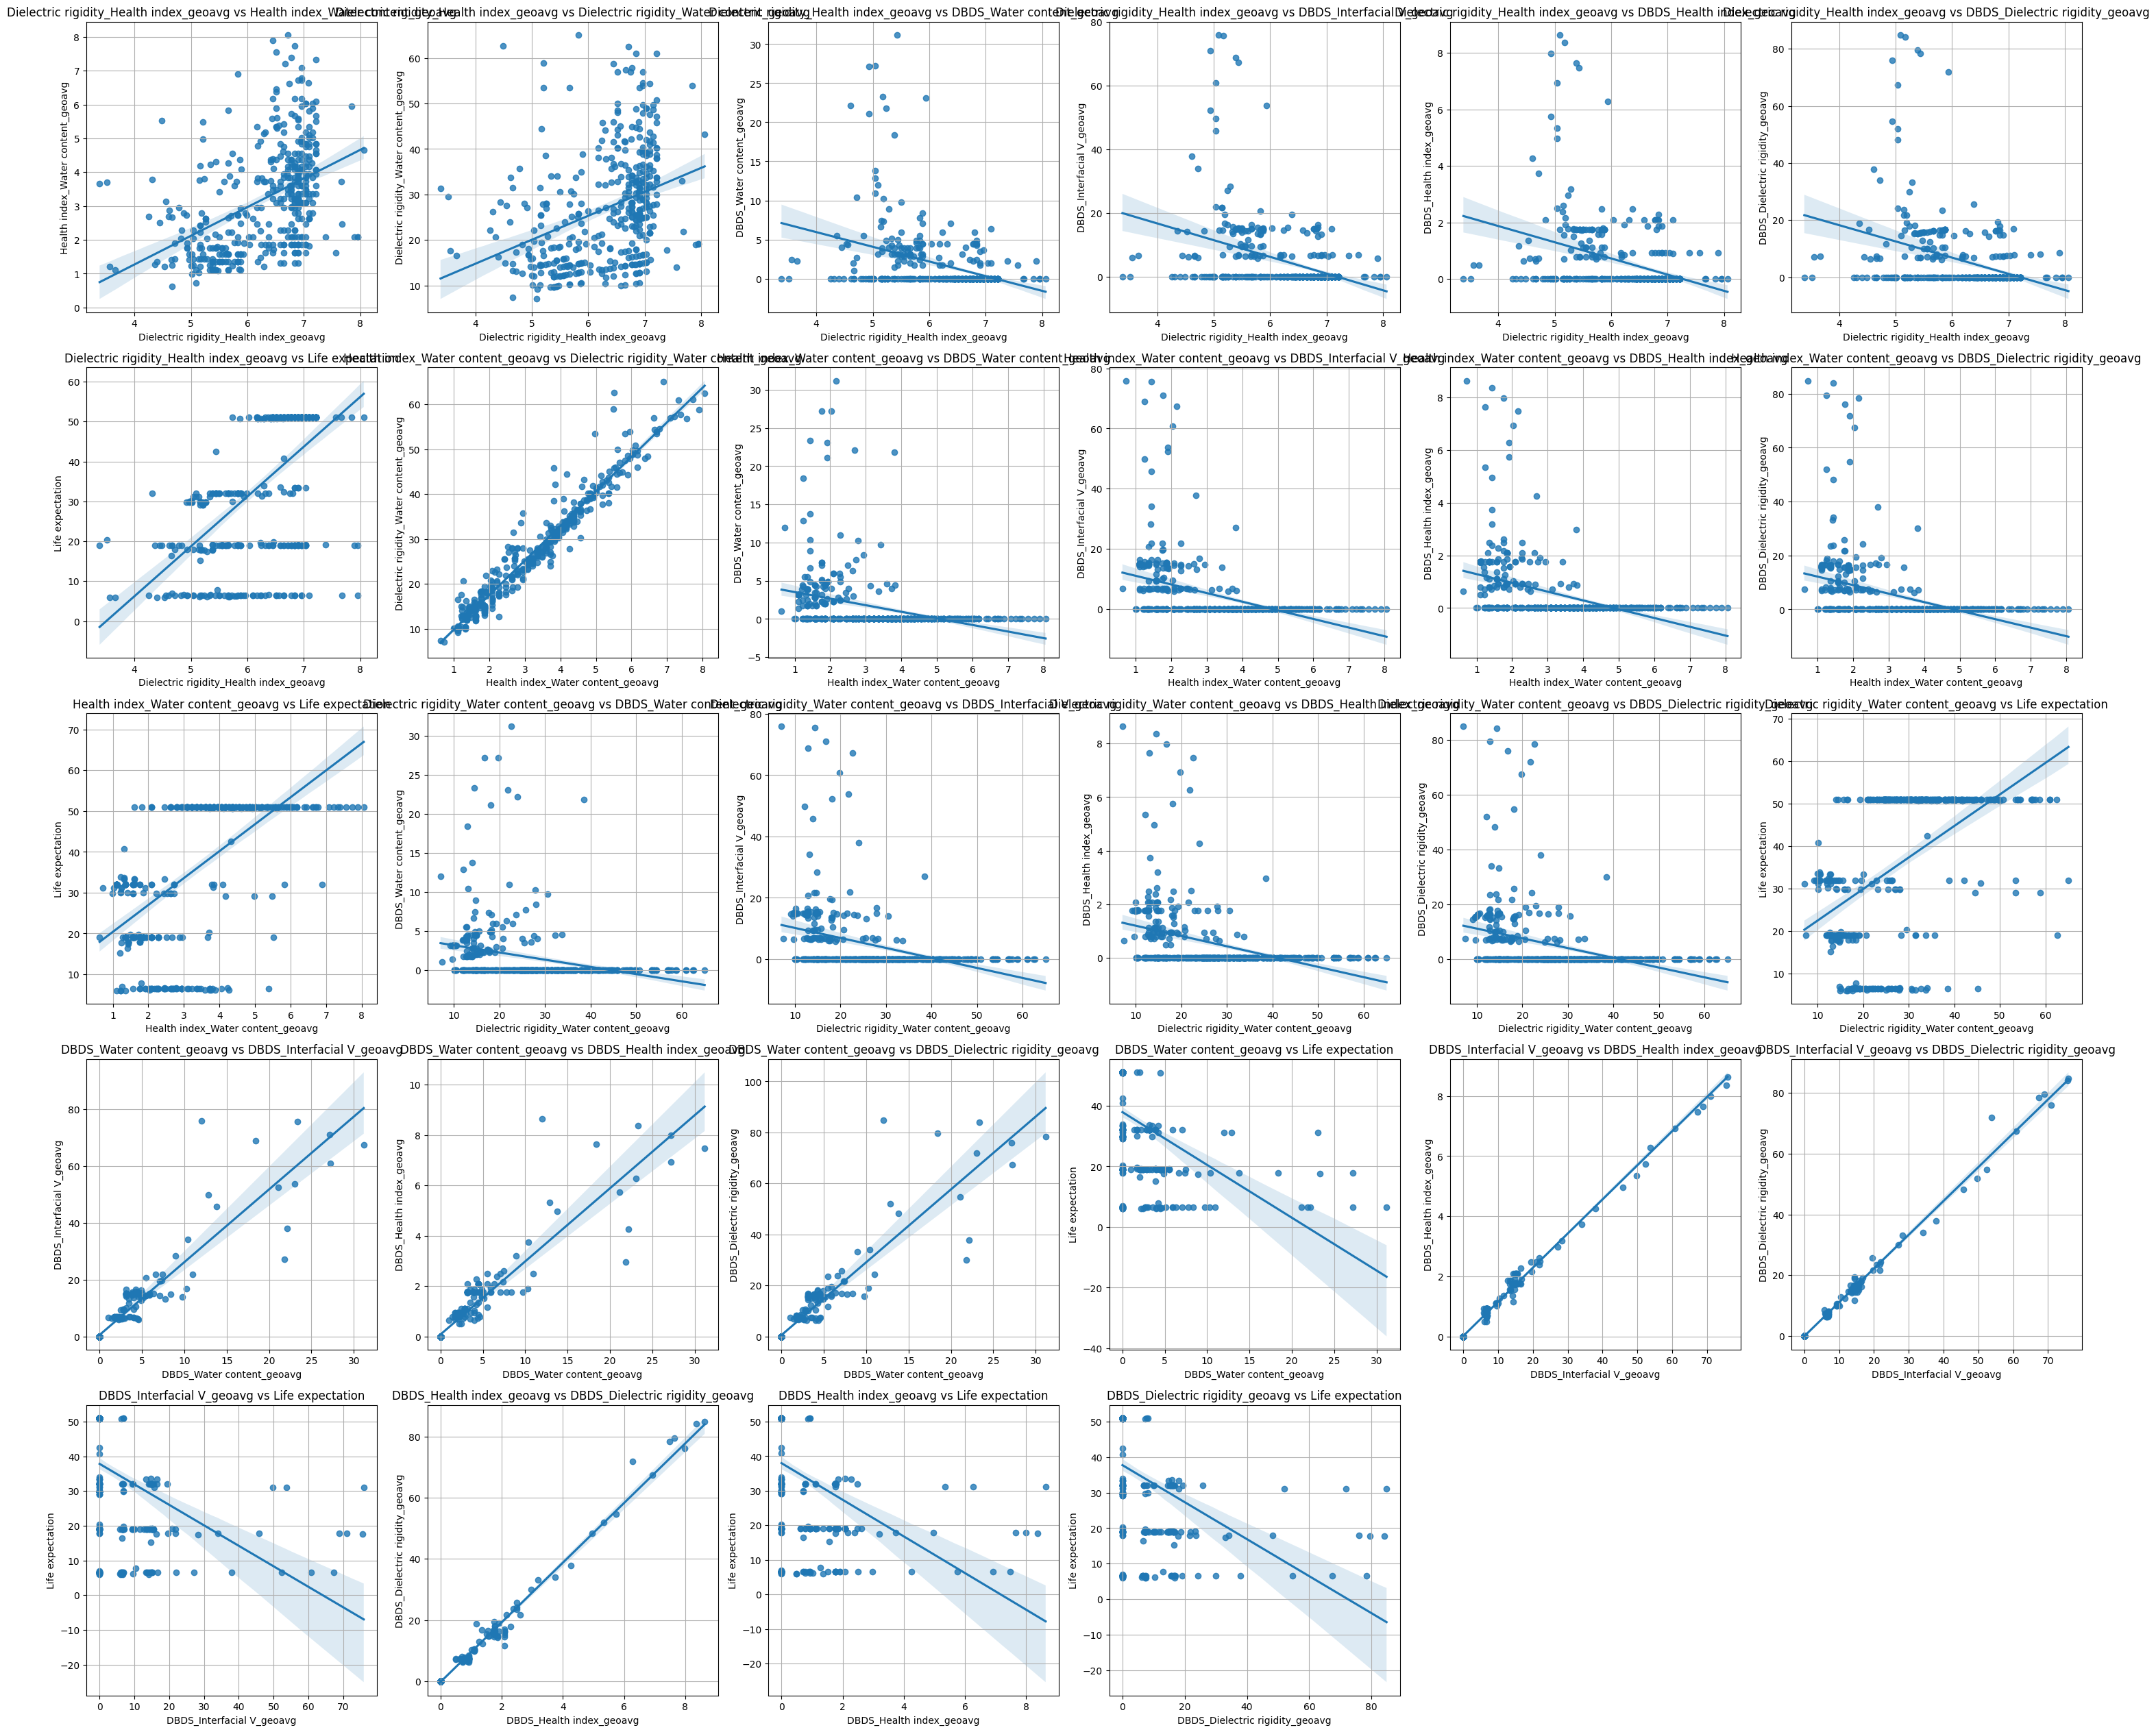

In [43]:
plot_most_correlated_grid(pd.concat([input_df, enhancend_hlth_df.loc[input_df.index][targets]], axis=1), new_top_correlated + targets)
save_plot(f'{top_n} Most Correlated Features with the Target without outliers')
plt.show()

In [44]:
input_df.to_numpy().shape

(414, 12)

In [45]:
targets

['Life expectation']

Agora o modelo pode ser construído. Os gráficos anteriores mostram que os valores da expectativa do tempo de vida são valores contínuos, e embora estejam pouco distribuídos, ainda podemos usar regressão neles. Para a classificação, o primeiro passo diferente do processo em regressão será a discretização, e depois os outros passos.

## Construção dos Modelos

### Regressão

É uma técnica de aprendizado de máquina supervisionado usada para prever uma variável dependente contínua com base em uma ou mais variáveis independentes (também chamadas de características ou features). Os modelos de regressão aprendem padrões nos dados para estimar um valor futuro ou desconhecido.

No nosso contexto, a variável alvo é a ***Expectativa de vida***, que é uma métrica contínua representando quantos anos o transformador pode durar (provavelmente). Vamos demonstrar como dois modelos de regressão—***Regressão Linear*** e ***Random Forest***—podem ser usados para fazer a previsão.

#### Processo de Construção do Modelo
1.  ***Pré-processamento dos Dados***

Antes de construir os modelos, normalizamos as variáveis para garantir que todas estejam na mesma escala. Isso é particularmente importante para métodos sensíveis a escalas, como a Regressão Linear.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Features and target
X = StandardScaler().fit_transform(input_df.to_numpy())
y = enhancend_hlth_df.loc[input_df.index][targets[0]].to_numpy().reshape((-1, 1)) # Life Expectation



2.  ***Divisão do Conjunto de Dados***

Dividimos os dados em conjuntos de treino (80%) e teste (20%) para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.

In [47]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.  ***Modelo 1: Regressão Linear***

A ***Regressão Linear*** é um modelo simples e interpretável, ideal como ponto de partida para qualquer problema de regressão.

In [48]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 9.45346030836203
Root Mean Squared Error: 13.018863938523733


***Resultados:***

-   ***Erro Médio Absoluto (MAE)***: 9.45
-   ***Raiz do Erro Quadrático Médio (RMSE)***: 13.01

Esses valores indicam o quanto, em média, as previsões do modelo divergem do valor real. Como exemplo, ao prever a Expectativa de vida para um caso específico:

In [50]:
model.predict(X_test[[9]]), y_test[[9]]

(array([[33.17472827]]), array([[32.]]))

A saída foi:

```
(array([[33.17472827]]), array([[32.]]))
```

O modelo superestimou ligeiramente a expectativa de vida para este exemplo.

***Modelo 2: Random Forest Regressor***

O ***Random Forest Regressor*** é um modelo de aprendizado de máquina mais avançado e robusto, que combina vários modelos de decisão para melhorar a precisão e reduzir o risco de overfitting.

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())

# Evaluate the Random Forest model
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest MAE: 7.484987951807228
Random Forest RMSE: 12.789592600687726


O Random Forest superou a Regressão Linear, reduzindo os erros médio absoluto e quadrático. Para o mesmo exemplo anterior:

In [52]:
np.argwhere(np.logical_and(rf_model.predict(X_test) - y_test.ravel() < 2, rf_model.predict(X_test) - y_test.ravel() > -2))[1]

array([15])

In [53]:
rf_model.predict(X_test[[15]]), y_test[15]

(array([20.412]), array([19.]))

Apesar da diferença entre previsão e valor real, o modelo se aproxima mais da realidade em relação à Regressão Linear.

Os resultados mostram que:

-   A Regressão Linear é simples e fácil de interpretar, mas tem limitações em capturar relações complexas.

-   O Random Forest captura melhor as complexidades dos dados e fornece previsões mais precisas, ao custo de ser mais difícil de interpretar.

Esses modelos ilustram como diferentes abordagens de regressão podem ser aplicadas em problemas práticos. Em um cenário real, o modelo escolhido dependerá do equilíbrio entre precisão, interpretabilidade e requisitos do projeto.

### Classificação

Na ***classificação***, o objetivo é prever rótulos categóricos baseados em padrões aprendidos nos dados. Nesse caso, discretizamos a expectativa de vida (um valor contínuo) em cinco categorias: "Muito Curto," "Curto," "Moderado," "Longo" e "Muito Longo".

#### Processo de Construção do Modelo

1.  Discretização da Expectativa de Vida

Usamos o método KBinsDiscretizer para dividir a variável contínua Expectativa de Vida em cinco categorias uniformes, garantindo que as faixas sejam distribuídas igualmente.

In [54]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy = 'uniform', random_state=42)

# Features and target
y_discretized = discretizer.fit_transform(enhancend_hlth_df.loc[input_df.index][targets[0]].to_numpy().reshape((-1, 1))).ravel()

discretizer.bin_edges_

array([array([ 6., 15., 24., 33., 42., 51.])], dtype=object)

Os intervalos resultantes para as categorias foram:

-   Muito Curto: [6, 15)
-   Curto: [15, 24)
-   Moderado: [24, 33)
-   Longo: [33, 42)
-   Muito Longo: [42, 51]

2.  Divisão do Conjunto de Dados

Utilizamos o ***StratifiedShuffleSplit*** para garantir que todas as categorias fiquem proporcionalmente representadas nos conjuntos de treino e teste.

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

# Splitting the data
train_set_split, test_set_split = next(split.split(X, y_discretized))

(X_train, y_train), (X_test, y_test) = (X[train_set_split], y_discretized[train_set_split]), (X[test_set_split], y_discretized[test_set_split])

3.  Treinamento do Modelo de Classificação

Começamos com a Regressão Logística, que é um modelo interpretable e eficiente para problemas lineares.

In [56]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=1000, random_state=42)

4.  Avaliação do Modelo

Para avaliar o desempenho, utilizamos o relatório de classificação e a matriz de confusão. Isso nos permite identificar como o modelo se sai em cada categoria.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test)

classes = ['Muito Curto', 'Curto', 'Moderado', 'Longo', 'Muito Longo']

# Evaluation metrics
print(classification_report(y_test, y_pred, target_names=classes, zero_division=1))


              precision    recall  f1-score   support

 Muito Curto       0.38      0.25      0.30        12
       Curto       0.48      0.71      0.57        17
    Moderado       0.44      0.33      0.38        12
       Longo       1.00      0.00      0.00         1
 Muito Longo       0.95      0.95      0.95        41

    accuracy                           0.70        83
   macro avg       0.65      0.45      0.44        83
weighted avg       0.70      0.70      0.69        83



### Resumo das Métricas

1. **Precisão**:
   - Mede a qualidade das predições de uma classe.    
   - Exemplo: "Muito Longo" teve 95% de precisão.

2. **Revocação**:
   - Mede quantas instâncias reais de uma classe foram corretamente identificadas.   
   - Exemplo: "Muito Longo" teve 95% de revocação.

3. **F1-Score**:
   - Combina precisão e revocação para um equilíbrio.  
   - Exemplo: A classe "Muito Longo" apresentou bom desempenho geral.

4. **Acurácia**:
   - Percentual de predições corretas no total.

Essas métricas indicam que o modelo tem um bom desempenho para classes maiores, mas dificuldade com classes menos representadas, como "Longo".

#### ***Resultados***

-   Acurácia geral: 70%
-   Desempenho por categoria:
    -  "Muito Longo" teve um ótimo desempenho (F1-score: 0.95), indicando que o modelo prediz bem essa classe majoritária.
    -   "Muito Curto" e "Moderado" tiveram F1-scores mais baixos (0.30 e 0.38, respectivamente), possivelmente devido à escassez de dados nessas categorias.
    -   "Longo" apresentou recall de 0, o que indica que o modelo não conseguiu identificar corretamente nenhum exemplo dessa classe.

---

Imagem salva como: plots/Confusion Matrix.png


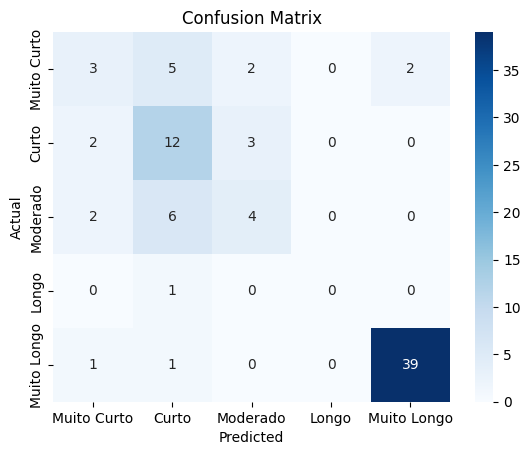

In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
save_plot('Confusion Matrix')
plt.show()

Essa é a matriz de confusão gerada para o modelo de classificação da expectativa de vida dos transformadores. Vamos analisá-la com mais detalhes e incorporar as observações no texto da seção sobre classificação:

***Interpretação da Matriz de Confusão***

A matriz de confusão nos dá uma visão detalhada sobre o desempenho do modelo em cada classe. Aqui estão os principais insights:

1. **Classe "Muito Longo"**
   - Predições: 39 casos foram corretamente classificados como "Muito Longo".
   - O modelo tem um ótimo desempenho para essa classe, refletido pela alta precisão e recall. Isso ocorre devido à dominância dessa categoria no conjunto de dados.

2. **Classe "Longo"**
   - Não houve nenhuma previsão correta para "Longo". Essa classe foi confundida principalmente com "Curto".
   - Esse desempenho pode ser atribuído à falta de amostras suficientes ou à proximidade entre as classes "Longo" e outras.

3. **Classes "Muito Curto" e "Curto"**
   - As predições para essas classes mostram confusões mistas:
     - "Muito Curto" frequentemente é previsto como "Curto" ou "Moderado".
     - "Curto" apresenta desempenho razoável, com 12 casos corretamente previstos.

4. **Classe "Moderado"**
   - A classe "Moderado" tem resultados variados, com algumas predições corretas (3), mas muitas confusões com "Muito Curto".

---

***Reflexões e Melhorias***

1.  ***Desbalanceamento de Dados***: O desempenho ruim em categorias minoritárias como "Moderado" e "Longo" é um reflexo direto do desbalanceamento no conjunto de dados. Isso pode ser melhorado com técnicas como:

    -   Sobreamostragem das classes minoritárias.
    -   Aplicação de pesos nas classes durante o treinamento.

2.  ***Modelos Avançados***: Experimentar modelos mais sofisticados, como Random Forest ou Gradient Boosting, pode melhorar a captura de padrões não lineares.

3.  ***Ajustes nos Hiperparâmetros***: Ajustar parâmetros como regularização na Regressão Logística ou o número de estimadores em modelos baseados em árvores pode refinar os resultados.